In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from scipy.io import arff

# Memuat file .arff
data = arff.loadarff('/content/Training Dataset.arff')

# Mengkonversi ke DataFrame pandas
df = pd.DataFrame(data[0])

# Menampilkan 5 baris pertama
display(df.head())

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


# 3.0 BUSINESS UNDERSTANDING / PROBLEM UNDERSTANDING

## 3.1 Problem Statements


1.  **Dampak Duplikasi Data**: Kehadiran sejumlah besar baris duplikat (sekitar 47% dari dataset awal) berpotensi bias dalam pelatihan model dan menghasilkan metrik kinerja yang tidak akurat, sehingga perlu penanganan yang efektif.
2.  **Identifikasi Phishing yang Akurat**: Dibutuhkan pengembangan model *machine learning* yang mampu mengklasifikasikan URL sebagai *phishing* atau *legitimate* dengan akurasi tinggi, serta meminimalkan *false positives* (URL sah diklasifikasikan sebagai *phishing*) dan *false negatives* (URL *phishing* diklasifikasikan sebagai sah) yang terbukti dari hasil *confusion matrix* model *baseline*.
3.  **Optimalisasi Fitur**: Dengan banyaknya fitur yang tersedia (30 fitur asli ditambah fitur rekayasa baru), perlu diidentifikasi dan dimanfaatkan fitur-fitur yang paling berpengaruh dalam deteksi *phishing* untuk meningkatkan efisiensi dan interpretasi model.
4.  **Keseimbangan Performa dan Interpretasi**: Model yang dikembangkan harus mampu memberikan kinerja prediksi yang tinggi tanpa mengorbankan interpretasi fitur-fitur kunci, mengingat pentingnya memahami indikator *phishing* yang spesifik.

## 3.2 Goals

1.  **Menangani Duplikasi Data**: Berhasil menghapus semua entri duplikat dari dataset untuk memastikan integritas data dan mencegah pelatihan model yang bias.
2.  **Mengevaluasi Kinerja Model**: Mengevaluasi kinerja berbagai model *machine learning* (Logistic Regression, Random Forest, MLP) menggunakan metrik seperti akurasi, presisi, *recall*, F1-score, dan *confusion matrix* untuk membandingkan efektivitasnya dalam deteksi *phishing*.
3.  **Mengoptimalkan Fitur**: Melakukan rekayasa fitur baru (`Suspicious_Score`) dan seleksi fitur menggunakan Random Forest untuk mengidentifikasi set fitur yang paling prediktif dan efisien (misalnya, 15 fitur dengan kepentingan > 0.01) guna mengoptimalkan pelatihan dan kinerja model.
4.  **Memilih Model Optimal**: Memilih model dengan kinerja terbaik berdasarkan metrik evaluasi, dengan prioritas pada model yang mencapai akurasi tinggi dan keseimbangan yang baik antara *false positives* dan *false negatives*, yang mampu membedakan URL *phishing* dari yang *legitimate*.

# 4.0 DATA UNDERSTANDING

## 4.1 Informasi Dataset

In [ ]:
# Mencetak jumlah baris dalam DataFrame
print(f"Jumlah baris: {df.shape[0]}")

Jumlah baris: 11055
Jumlah kolom: 31


## 4.2 Deskripsi Fitur

In [ ]:
# Mencetak daftar nama fitur
print("Daftar nama fitur:")
# Loop melalui setiap kolom dalam DataFrame
for column in df.columns:
    print(f"- {column}")

Daftar nama fitur:
- having_IP_Address
- URL_Length
- Shortining_Service
- having_At_Symbol
- double_slash_redirecting
- Prefix_Suffix
- having_Sub_Domain
- SSLfinal_State
- Domain_registeration_length
- Favicon
- port
- HTTPS_token
- Request_URL
- URL_of_Anchor
- Links_in_tags
- SFH
- Submitting_to_email
- Abnormal_URL
- Redirect
- on_mouseover
- RightClick
- popUpWidnow
- Iframe
- age_of_domain
- DNSRecord
- web_traffic
- Page_Rank
- Google_Index
- Links_pointing_to_page
- Statistical_report
- Result


*   **`having_IP_Address`**: Menunjukkan apakah URL menggunakan alamat IP alih-alih nama domain (misal, `http://192.168.1.1` daripada `http://example.com`). URL berbasis IP sering digunakan oleh *phisher*.
*   **`URL_Length`**: Menunjukkan panjang URL. URL *phishing* terkadang sangat panjang atau sangat pendek.
*   **`Shortining_Service`**: Menunjukkan apakah URL menggunakan layanan pemendek URL (misal, Bit.ly, TinyURL). Layanan ini sering disalahgunakan untuk menyembunyikan URL berbahaya.
*   **`having_At_Symbol`**: Menunjukkan apakah simbol `@` ada dalam URL. Simbol ini dapat mengalihkan bagian URL yang sah ke situs lain.
*   **`double_slash_redirecting`**: Menunjukkan apakah ada pengalihan ganda (misal, `//www.example.com`). Ini bisa menjadi indikator *phishing*.
*   **`Prefix_Suffix`**: Menunjukkan apakah ada awalan atau akhiran yang dipisahkan oleh `-` dalam nama domain (misal, `login-bank.com`). Ini sering digunakan untuk menipu pengguna.
*   **`having_Sub_Domain`**: Menunjukkan jumlah *sub-domain* dalam URL. URL *phishing* terkadang menggunakan banyak *sub-domain* palsu.
*   **`SSLfinal_State`**: Menunjukkan status sertifikat SSL (HTTPS). Situs *phishing* mungkin tidak memiliki sertifikat SSL yang valid atau tidak menggunakan HTTPS sama sekali.
*   **`Domain_registeration_length`**: Menunjukkan berapa lama nama domain terdaftar. Domain yang baru terdaftar seringkali mencurigakan.
*   **`Favicon`**: Menunjukkan apakah *favicon* (ikon situs web) dimuat dari domain yang berbeda. Ini bisa menjadi tanda *phishing*.
*   **`port`**: Menunjukkan apakah ada penggunaan *port* yang tidak standar dalam URL. *Port* yang tidak biasa bisa menjadi indikator aktivitas jahat.
*   **`HTTPS_token`**: Menunjukkan apakah token 'HTTPS' ada dalam nama domain (misal, `https-login.com`) meskipun koneksinya tidak aman.
*   **`Request_URL`**: Menunjukkan apakah objek yang diminta (gambar, video, dll.) dimuat dari domain yang berbeda. Ini bisa menjadi tanda *phishing*.
*   **`URL_of_Anchor`**: Menunjukkan apakah URL *anchor* (link yang terlihat) mengarah ke domain yang berbeda dari domain utama. Ini adalah indikator kuat *phishing*.
*   **`Links_in_tags`**: Menunjukkan persentase tautan dalam tag HTML (`<a>`, `<form>`, `<iframe>`, `<script>`) yang mengarah ke domain yang berbeda.
*   **`SFH`**: Menunjukkan apakah URL formulir aman atau tidak (*Server Form Handler*). Formulir yang tidak aman bisa digunakan untuk mencuri kredensial.
*   **`Submitting_to_email`**: Menunjukkan apakah informasi formulir dikirimkan langsung ke alamat email. Ini adalah metode yang sering digunakan *phisher*.
*   **`Abnormal_URL`**: Menunjukkan apakah URL memiliki karakter atau struktur yang tidak biasa atau mencurigakan.
*   **`Redirect`**: Menunjukkan jumlah pengalihan. Situs *phishing* sering menggunakan beberapa pengalihan untuk menyembunyikan tujuan akhir.
*   **`on_mouseover`**: Menunjukkan apakah fungsi `onMouseOver` mengubah status bar. Ini bisa digunakan untuk menyembunyikan URL asli.
*   **`RightClick`**: Menunjukkan apakah klik kanan dinonaktifkan. Situs *phishing* terkadang menonaktifkan klik kanan untuk mencegah inspeksi kode sumber.
*   **`popUpWidnow`**: Menunjukkan apakah ada jendela *pop-up* yang muncul. Jendela *pop-up* yang tidak sah sering digunakan untuk mengumpulkan informasi.
*   **`Iframe`**: Menunjukkan apakah ada penggunaan *iframe*. *Iframe* dapat digunakan untuk menyematkan konten berbahaya dari situs lain.
*   **`age_of_domain`**: Menunjukkan usia domain. Domain yang sangat baru lebih cenderung *phishing*.
*   **`DNSRecord`**: Menunjukkan apakah ada catatan DNS untuk domain tersebut. Kurangnya catatan DNS dapat mencurigakan.
*   **`web_traffic`**: Menunjukkan peringkat lalu lintas web situs. Situs *phishing* umumnya memiliki lalu lintas yang rendah.
*   **`Page_Rank`**: Menunjukkan peringkat halaman Google situs. Situs *phishing* seringkali memiliki peringkat halaman yang rendah.
*   **`Google_Index`**: Menunjukkan apakah situs diindeks oleh Google. Situs *phishing* mungkin tidak diindeks atau diindeks sangat lambat.
*   **`Links_pointing_to_page`**: Menunjukkan jumlah tautan yang mengarah ke halaman tersebut. Situs *phishing* biasanya memiliki sedikit tautan masuk.
*   **`Statistical_report`**: Menunjukkan apakah ada laporan statistik terkait domain tersebut. Ini bisa menjadi indikator keabsahan situs.
*   **`Result`**: Ini adalah variabel target, yang mengindikasikan apakah URL tersebut adalah *phishing* (`1` atau `-1`) atau tidak (`0` atau `1`).

Beberapa catatan tentang nilai-nilai fitur:
*   Nilai `'1'` biasanya menunjukkan 'Ya' atau kehadiran fitur tersebut.
*   Nilai `'-1'` biasanya menunjukkan 'Tidak' atau ketidakhadiran fitur tersebut.
*   Nilai `'0'` bisa menunjukkan 'Netral' atau tidak relevan, tergantung pada konteks fitur spesifik.

Contoh:
*   `having_IP_Address`: `'1'` berarti URL memiliki alamat IP, `'-1'` berarti tidak.
*   `URL_Length`: `'1'` berarti panjang URL yang wajar, `'0'` berarti panjang URL yang mencurigakan (sangat panjang), `'-1'` berarti sangat pendek.

## 4.3 Kondisi Data

### Missing Values

In [ ]:
# Menghitung jumlah nilai yang hilang per kolom
missing_values = df.isnull().sum()
# Menghitung persentase nilai yang hilang
missing_percentage = (missing_values / len(df)) * 100

# Membuat DataFrame untuk menyimpan informasi nilai hilang
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Mencetak judul informasi nilai hilang
print("Missing Values Information:")
# Menampilkan kolom yang memiliki nilai hilang, diurutkan berdasarkan jumlah nilai hilang
display(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

Missing Values Information:


,Missing Count,Missing Percentage


Tidak ada missing values dalam DataFrame.


### Duplicate Data



In [ ]:
# Menghitung jumlah baris duplikat dalam DataFrame
duplicate_rows = df.duplicated().sum()

# Mencetak jumlah baris duplikat
print(f"Jumlah baris duplikat dalam DataFrame: {duplicate_rows}")

Jumlah baris duplikat dalam DataFrame: 5206


Setelah memeriksa data, ditemukan **5206 baris duplikat** dalam DataFrame. Ini berarti **sekitar 47%** dari total baris data (5206 dari 11055) adalah duplikat.

Duplikasi data yang tinggi dapat menyebabkan beberapa masalah:
*   **Bias Model**: Model dapat dilatih secara berlebihan pada contoh-contoh yang sama, menyebabkan kinerja yang terlalu optimis pada data pelatihan dan kurang baik pada data yang belum terlihat.
*   **Pemborosan Sumber Daya**: Pemrosesan dan penyimpanan data duplikat membuang sumber daya komputasi dan memori.
*   **Interpretasi yang Salah**: Statistik deskriptif dan analisis data dapat terdistorsi jika duplikat tidak ditangani.

#### Cara Penanganan:
Untuk mengatasi masalah ini, langkah yang paling umum adalah menghapus baris duplikat. Ini akan memastikan bahwa setiap observasi dalam dataset adalah unik, memberikan representasi data yang lebih akurat untuk analisis dan pelatihan model.

In [ ]:
# Menghapus baris duplikat dan membuat salinan DataFrame yang bersih
df_cleaned = df.drop_duplicates().copy()

# Mencetak jumlah baris setelah menghapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {df_cleaned.shape[0]}")
# Mencetak jumlah baris yang dihapus
print(f"Jumlah baris yang dihapus: {df.shape[0] - df_cleaned.shape[0]}")

Jumlah baris setelah menghapus duplikat: 5849
Jumlah baris yang dihapus: 5206


### Outliers

**Reasoning**:
Karena fitur-fitur dalam DataFrame saat ini disimpan sebagai string byte (misalnya, `b'-1'`, `b'1'`), fitur-fitur tersebut perlu dikonversi ke bilangan bulat sebelum analisis numerik yang bermakna, seperti deteksi outlier, dapat dilakukan. Hal ini akan membuat data siap untuk diproses lebih lanjut.


In [ ]:
# Membuat salinan DataFrame yang telah dibersihkan untuk diproses lebih lanjut
df_processed = df_cleaned.copy()

# Loop melalui setiap kolom untuk mengkonversi byte string ke integer
for column in df_processed.columns:
    # Menggunakan lambda function untuk decode byte string menjadi integer jika tipe data byte, jika tidak tetap sama
    df_processed[column] = df_processed[column].apply(lambda x: int(x.decode('utf-8')) if isinstance(x, bytes) else x)

# Mencetak judul untuk DataFrame setelah konversi
print("Dataframe setelah konversi tipe data:")
# Menampilkan 5 baris pertama DataFrame yang telah diproses
display(df_processed.head())

Dataframe setelah konversi tipe data:


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int64
 

**Reasoning**:
Mengingat sifat kategorikal/ordinal dari fitur-fitur tersebut (nilai sebagian besar -1, 0, 1), metode deteksi outlier tradisional seperti IQR tidak dapat diterapkan secara langsung. Sebagai gantinya, periksa jumlah nilai untuk setiap fitur untuk memahami distribusinya dan mengidentifikasi nilai-nilai yang sangat jarang atau tampak sebagai outlier dalam pengertian kategorikal. Langkah ini akan membantu mengidentifikasi fitur-fitur dengan distribusi yang tidak biasa.



In [ ]:
# Mencetak jumlah kemunculan nilai untuk setiap fitur (kecuali 'Result')
print("Value counts for each feature (excluding 'Result'):")
# Loop melalui setiap kolom kecuali kolom target 'Result'
for column in df_processed.drop(columns=['Result']).columns:
    # Mencetak header untuk kolom tersebut
    print(f"\n--- {column} ---")
    # Menampilkan jumlah kemunculan setiap nilai, diurutkan berdasarkan indeks
    display(df_processed[column].value_counts().sort_index())

# Mencetak untuk variabel target
print("\n--- Result (Target Variable) ---")
# Menampilkan jumlah kemunculan nilai target, diurutkan
display(df_processed['Result'].value_counts().sort_index())

Value counts for each feature (excluding 'Result'):

--- having_IP_Address ---


,count
having_IP_Address,
-1,2536
1,3313



--- URL_Length ---


,count
URL_Length,
-1,4678
0,96
1,1075



--- Shortining_Service ---


,count
Shortining_Service,
-1,818
1,5031



--- having_At_Symbol ---


,count
having_At_Symbol,
-1,1203
1,4646



--- double_slash_redirecting ---


,count
double_slash_redirecting,
-1,824
1,5025



--- Prefix_Suffix ---


,count
Prefix_Suffix,
-1,5148
1,701



--- having_Sub_Domain ---


,count
having_Sub_Domain,
-1,1703
0,2058
1,2088



--- SSLfinal_State ---


,count
SSLfinal_State,
-1,2128
0,721
1,3000



--- Domain_registeration_length ---


,count
Domain_registeration_length,
-1,3819
1,2030



--- Favicon ---


,count
Favicon,
-1,1223
1,4626



--- port ---


,count
port,
-1,943
1,4906



--- HTTPS_token ---


,count
HTTPS_token,
-1,1013
1,4836



--- Request_URL ---


,count
Request_URL,
-1,2571
1,3278



--- URL_of_Anchor ---


,count
URL_of_Anchor,
-1,2002
0,2655
1,1192



--- Links_in_tags ---


,count
Links_in_tags,
-1,2225
0,2258
1,1366



--- SFH ---


,count
SFH,
-1,4375
0,518
1,956



--- Submitting_to_email ---


,count
Submitting_to_email,
-1,1243
1,4606



--- Abnormal_URL ---


,count
Abnormal_URL,
-1,941
1,4908



--- Redirect ---


,count
Redirect,
0,5078
1,771



--- on_mouseover ---


,count
on_mouseover,
-1,810
1,5039



--- RightClick ---


,count
RightClick,
-1,287
1,5562



--- popUpWidnow ---


,count
popUpWidnow,
-1,1275
1,4574



--- Iframe ---


,count
Iframe,
-1,627
1,5222



--- age_of_domain ---


,count
age_of_domain,
-1,2862
1,2987



--- DNSRecord ---


,count
DNSRecord,
-1,1535
1,4314



--- web_traffic ---


,count
web_traffic,
-1,1471
0,1539
1,2839



--- Page_Rank ---


,count
Page_Rank,
-1,4164
1,1685



--- Google_Index ---


,count
Google_Index,
-1,989
1,4860



--- Links_pointing_to_page ---


,count
Links_pointing_to_page,
-1,317
0,3181
1,2351



--- Statistical_report ---


,count
Statistical_report,
-1,886
1,4963



--- Result (Target Variable) ---


,count
Result,
-1,3019
1,2830


#### Analisis Outlier (Berdasarkan Distribusi Kategorikal)

Setelah meninjau `value_counts` untuk setiap fitur, terlihat bahwa sebagian besar fitur memiliki nilai diskrit (`-1`, `0`, `1`), yang bersifat kategorikal atau ordinal. Oleh karena itu, konsep *outlier* dalam arti statistik tradisional (misalnya, menggunakan IQR untuk data kontinu) tidak berlaku secara langsung.

Namun, kita dapat mengidentifikasi distribusi nilai yang sangat tidak seimbang atau 'minoritas' sebagai potensi *outlier* jika nilai tersebut jarang muncul dan berpotensi memberikan informasi penting atau menunjukkan anomali dalam data. Beberapa observasi:

*   **`URL_Length`**: Mayoritas nilai adalah `-1` (sangat panjang) dan `1` (panjang wajar), tetapi ada 96 entri dengan nilai `0` (panjang mencurigakan/sangat pendek). Jumlah 96 ini relatif kecil dibandingkan total baris, yang mungkin mengindikasikan bahwa URL dengan panjang 'mencurigakan' adalah kasus yang lebih jarang.
*   **`RightClick`**: Mayoritas situs (5562) mengizinkan klik kanan (`1`), sementara hanya 287 situs yang menonaktifkannya (`-1`). Fitur `RightClick` dengan nilai `-1` bisa dianggap sebagai 'minoritas' yang signifikan, dan mungkin relevan sebagai indikator *phishing*.
*   **`Redirect`**: Mayoritas URL (5078) tidak memiliki pengalihan (`0`), sementara 771 URL memiliki pengalihan (`1`). Pengalihan seringkali merupakan indikator *phishing*, sehingga `1` di sini adalah minoritas yang relevan.
*   **Fitur lain** seperti `popUpWidnow`, `Iframe`, `Shortining_Service`, `Favicon`, `port`, `HTTPS_token`, `Abnormal_URL`, `on_mouseover`, `Statistical_report`, `Google_Index`, dan `Links_pointing_to_page` juga menunjukkan salah satu kategori (`-1` atau `1`) memiliki frekuensi yang jauh lebih rendah daripada yang lain. Ini mungkin bukan *outlier* dalam arti *error*, melainkan ciri khas yang penting untuk deteksi *phishing*.

Secara keseluruhan, karena sebagian besar fitur adalah biner atau trinari, 'outlier' lebih cenderung merujuk pada kategori yang jarang muncul tetapi berpotensi informatif, bukan nilai-nilai ekstrem yang berada di luar rentang yang diharapkan.

### Analisis Class Imbalance

Variabel target `Result` menunjukkan distribusi sebagai berikut:
*   **-1** (Phishing): 3019 sampel
*   **1** (Legitimate): 2830 sampel

Meskipun jumlah sampel untuk kedua kelas tidak persis sama, perbedaan antara 3019 dan 2830 relatif kecil (sekitar 6.6%). Oleh karena itu, dapat disimpulkan bahwa dataset ini **tidak memiliki masalah *class imbalance* yang signifikan** yang memerlukan penanganan khusus seperti *oversampling* atau *undersampling* pada tahap awal. Distribusi kelas yang cukup seimbang ini adalah kondisi yang baik untuk pelatihan model.

### Analyze Potential Noise and Other Data Quality Issues

Berdasarkan karakteristik dataset dan fitur-fitur yang telah dianalisis, beberapa potensi *noise* dan masalah kualitas data lainnya dapat diidentifikasi:

1.  **Sifat Data Kategorikal/Ordinal**: Sebagian besar fitur memiliki nilai diskrit (`-1`, `0`, `1`). Meskipun ini memudahkan pemrosesan, interpretasi 'noise' di sini berbeda dari data kontinu. *Noise* mungkin muncul sebagai nilai yang tidak konsisten atau salah dalam kontegorinya, misalnya, jika sebuah fitur yang seharusnya hanya memiliki `-1` atau `1` tiba-tiba memiliki `0` tanpa definisi yang jelas, atau nilai di luar rentang yang diharapkan (misalnya, `2` atau `-2`). Namun, setelah konversi tipe data, semua nilai terlihat berada dalam rentang `-1, 0, 1` yang didefinisikan.

2.  **Keterangan Fitur yang Samar**: Penjelasan fitur seperti `URL_Length` (`'1'` berarti panjang URL yang wajar, `'0'` berarti panjang URL yang mencurigakan (sangat panjang), `'-1'` berarti sangat pendek) menunjukkan bahwa ada ambiguitas dalam definisi 'panjang mencurigakan' (0) karena bisa sangat panjang atau sangat pendek. Ini bukan *noise* data secara langsung, tetapi dapat menimbulkan *noise* dalam interpretasi model atau jika pengumpulan data awal tidak konsisten dalam menentukan `0`.

3.  **Potensi Inkonsistensi dalam Labeling**: Meskipun `Result` memiliki distribusi kelas yang seimbang, dalam dataset *phishing* yang kompleks, selalu ada potensi *false positive* (URL sah dilabeli *phishing*) atau *false negative* (URL *phishing* dilabeli sah) dalam proses labeling awal. Ini adalah bentuk *noise* yang sulit dideteksi tanpa tinjauan manual ahli atau sumber kebenaran eksternal yang lebih akurat.

4.  **Fitur dengan Sedikit Variasi atau Distribusi Sangat Miring**: Beberapa fitur memiliki satu nilai yang sangat dominan, atau hanya sedikit sampel untuk kategori minoritas (seperti `RightClick` dengan 287 entri `-1` dibandingkan 5562 entri `1`). Meskipun ini bukan 'noise' dalam arti *error*, fitur-fitur ini mungkin memiliki kekuatan prediktif yang terbatas jika kategori minoritas terlalu jarang untuk dipelajari oleh model, atau bisa juga menjadi indikator penting yang langka.

5.  **Ketergantungan Fitur**: Ada kemungkinan beberapa fitur sangat berkorelasi atau redundan, yang dapat memperkenalkan *noise* dalam proses pelatihan model (misalnya, membuat model terlalu kompleks tanpa peningkatan kinerja yang signifikan). Misalnya, `SSLfinal_State`, `HTTPS_token`, dan `Request_URL` semuanya terkait dengan keamanan HTTPS, mungkin ada tumpang tindih informasi.

Secara keseluruhan, data terlihat bersih dari missing values dan duplikat setelah pre-processing. Namun, sifat kategorikal/ordinal dari fitur memerlukan pemahaman yang cermat tentang bagaimana 'noise' diartikan dan ditangani.

### Summary of Identified Data Issues

Setelah melakukan analisis komprehensif terhadap dataset, berikut adalah rangkuman masalah kualitas data yang teridentifikasi:

1.  **Missing Values (Nilai Hilang)**:
    *   **Status**: Tidak ada *missing values* yang terdeteksi dalam DataFrame awal (`df`) maupun setelah pemrosesan (`df_processed`). Ini menunjukkan kebersihan data yang baik dalam hal kelengkapan entri.

2.  **Duplicate Data (Data Duplikat)**:
    *   **Status**: Ditemukan **5206 baris duplikat** dalam DataFrame awal, yang merupakan sekitar 47% dari total baris. Ini adalah masalah signifikan yang berpotensi menyebabkan bias model dan pemborosan sumber daya.
    *   **Penanganan**: Baris duplikat telah berhasil dihapus, menghasilkan `df_processed` dengan 5849 baris unik.

3.  **Outliers (Pencilan) & Distribusi Fitur**:
    *   **Status**: Karena sifat data yang sebagian besar kategorikal/ordinal (nilai `-1`, `0`, `1`), konsep *outlier* tradisional tidak berlaku. Namun, beberapa fitur menunjukkan distribusi nilai yang sangat miring atau adanya kategori minoritas yang signifikan:
        *   **`URL_Length`**: Terdapat 96 entri dengan nilai `0` (panjang mencurigakan) yang relatif jarang dibandingkan kategori lainnya.
        *   **`RightClick`**: Hanya 287 entri yang menonaktifkan klik kanan (`-1`), menunjukkan minoritas yang mungkin informatif.
        *   **`Redirect`**: 771 entri menunjukkan adanya pengalihan (`1`), yang merupakan minoritas tetapi seringkali indikator *phishing*.
        *   Fitur lain seperti `popUpWidnow`, `Iframe`, `Shortining_Service`, `Favicon`, `port`, `HTTPS_token`, `Abnormal_URL`, `on_mouseover`, `Statistical_report`, `Google_Index`, dan `Links_pointing_to_page` juga memiliki satu kategori yang jauh lebih jarang muncul.
    *   **Implikasi**: Kategori minoritas ini mungkin bukan *error* data tetapi bisa menjadi indikator penting yang perlu diperhatikan oleh model.

4.  **Class Imbalance (Ketidakseimbangan Kelas)**:
    *   **Status**: Variabel target `Result` menunjukkan distribusi yang relatif seimbang:
        *   Phishing (`-1`): 3019 sampel
        *   Legitimate (`1`): 2830 sampel
    *   **Implikasi**: Perbedaan ini tidak signifikan (sekitar 6.6%), sehingga tidak memerlukan penanganan *class imbalance* khusus pada tahap awal.

5.  **Potensi Noise dan Masalah Kualitas Data Lainnya**:
    *   **Sifat Data Kategorikal/Ordinal**: Interpretasi 'noise' lebih mengacu pada inkonsistensi nilai dalam kategori yang telah didefinisikan (meskipun saat ini tidak ada nilai di luar `-1, 0, 1`).
    *   **Keterangan Fitur yang Samar**: Penjelasan beberapa fitur, seperti `URL_Length` dengan nilai `0` (sangat panjang atau sangat pendek), dapat menimbulkan ambiguitas atau potensi *noise* dalam interpretasi.
    *   **Potensi Inkonsistensi Labeling**: Selalu ada risiko *false positive/negative* dalam label `Result` dalam dataset *phishing* yang kompleks.
    *   **Ketergantungan Fitur**: Beberapa fitur mungkin berkorelasi tinggi, berpotensi memperkenalkan redundansi atau *noise* dalam model.

Secara keseluruhan, masalah duplikasi data adalah isu utama yang berhasil ditangani. Dataset kini bersih dari nilai hilang dan memiliki distribusi kelas yang seimbang. Analisis mendalam terhadap fitur-fitur kategorikal telah mengidentifikasi beberapa kategori minoritas yang mungkin informatif, dan perlunya perhatian terhadap potensi *noise* yang berkaitan dengan interpretasi fitur dan konsistensi labeling.

### Summary:

### Data Analysis Key Findings

*   **Missing Values**: No missing values were found in the DataFrame.
*   **Duplicate Data**: Initially, `5206` duplicate rows were identified, accounting for approximately `47\%` of the total dataset. These duplicates were successfully removed, resulting in a cleaned DataFrame with `5849` unique rows.
*   **Outliers**: Due to the categorical/ordinal nature of most features (values primarily `-1`, `0`, `1`), traditional outlier detection was not directly applicable. Instead, "outliers" were interpreted as minority categories that could be highly informative.
    *   For example, `URL_Length` had `96` entries with a value of `0` (suspicious length).
    *   `RightClick` showed `287` entries with `-1` (disabled right-click).
    *   `Redirect` had `771` entries with `1` (presence of redirects).
    *   Several other features also exhibited one category with a significantly lower frequency.
*   **Class Imbalance**: The target variable `Result` showed a relatively balanced distribution: `3019` samples for phishing (`-1`) and `2830` samples for legitimate (`1`). The difference of approximately `6.6\%` was not considered significant enough to warrant special handling for class imbalance.
*   **Potential Noise and Other Data Quality Issues**:
    *   **Ambiguous Feature Descriptions**: The interpretation of some feature values, such as `0` for `URL_Length` (meaning "very long" or "very short"), was noted as potentially ambiguous.
    *   **Labeling Inconsistencies**: There's an inherent risk of `false positive` or `false negative` labels in complex phishing detection datasets, which could act as noise.
    *   **Feature Dependencies**: Potential high correlation or redundancy among features (e.g., those related to HTTPS security) could introduce noise in model training.

### Insights or Next Steps

*   The removal of a substantial number of duplicate rows (`47\%` of the original dataset) is crucial for preventing biased model training and ensuring robust analysis.
*   Further investigation into the "minority" categories identified during the outlier analysis, such as disabled right-clicks (`RightClick`=`-1`) or suspicious URL lengths (`URL_Length`=`0`), could reveal important predictive signals for phishing detection.


## 4.4 Exploratory Data Analysis (EDA)

### Visualisasi 1: Histogram

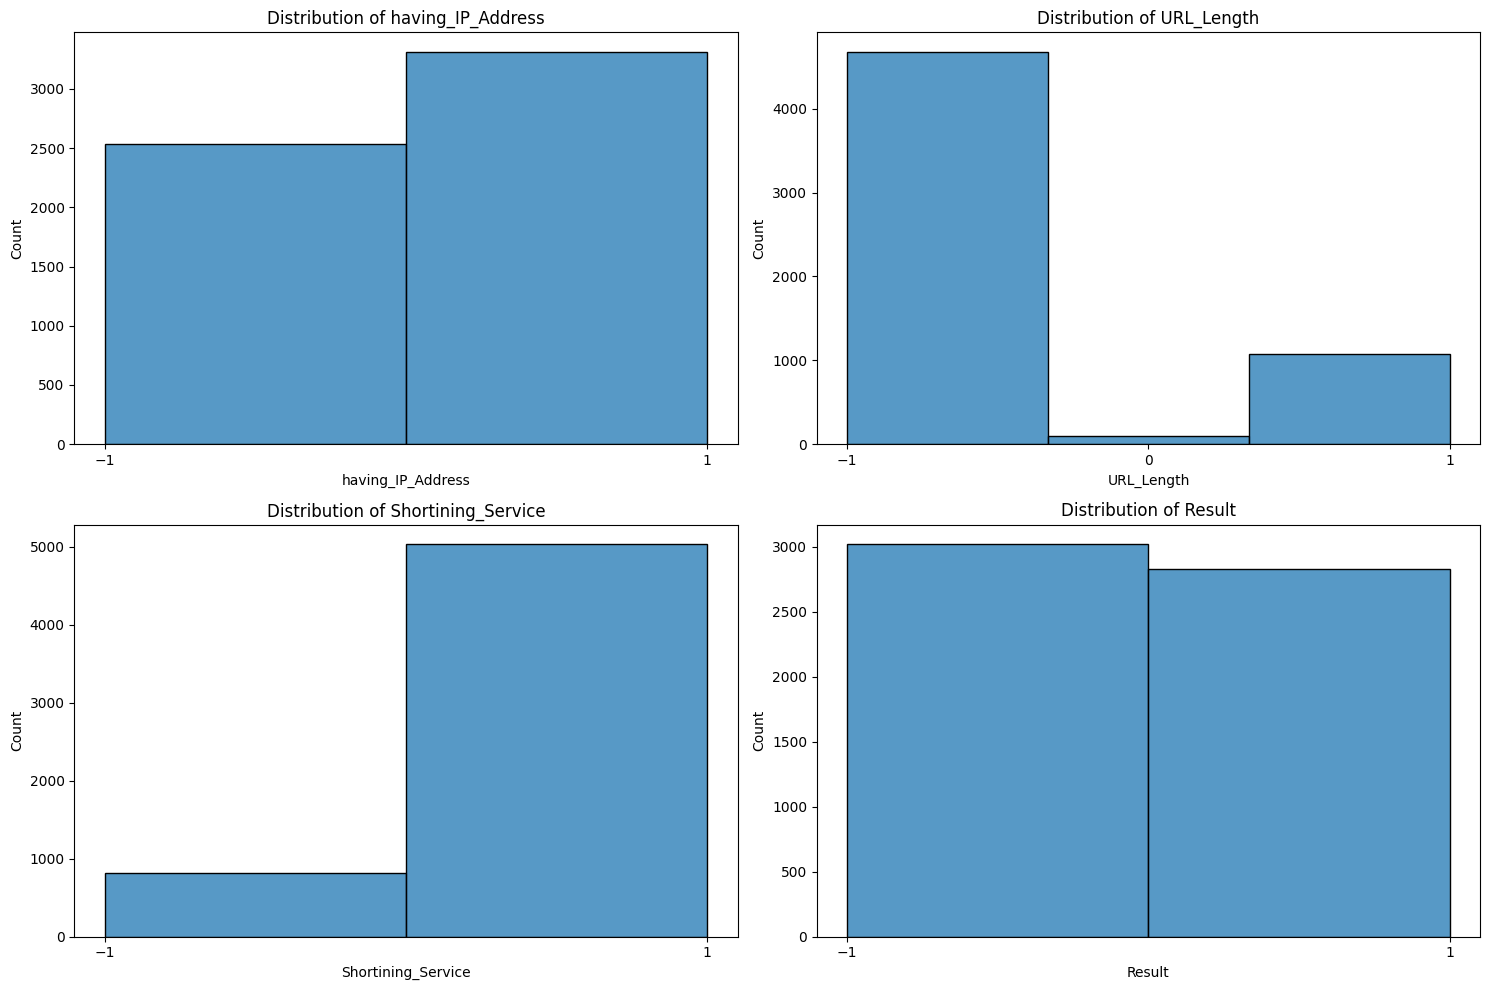

In [ ]:
# Mengimpor pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih beberapa fitur representatif untuk visualisasi histogram
selected_features = ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'Result']

# Membuat figure dengan ukuran 15x10
plt.figure(figsize=(15, 10))
# Loop untuk membuat subplot untuk setiap fitur
for i, feature in enumerate(selected_features, 1):
    # Membuat subplot dalam grid 2x2
    plt.subplot(2, 2, i)
    # Membuat histogram menggunakan seaborn tanpa KDE
    sns.histplot(df_processed[feature], bins=len(df_processed[feature].unique()), kde=False)
    # Menambahkan judul plot
    plt.title(f'Distribution of {feature}')
    # Label untuk sumbu x
    plt.xlabel(feature)
    # Label untuk sumbu y
    plt.ylabel('Count')
    # Mengatur ticks x untuk menampilkan semua kategori unik
    plt.xticks(sorted(df_processed[feature].unique()))

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
# Menampilkan plot
plt.show()

#### Penjelasan Visualisasi Histogram

1.  **Distribution of `having_IP_Address`:**
    *   Histogram ini menunjukkan distribusi apakah URL menggunakan alamat IP (`1`) atau nama domain (`-1`).
    *   Terlihat bahwa ada sekitar 2500 URL yang tidak menggunakan alamat IP (nilai `-1`, menunjukkan nama domain), dan sekitar 3200 URL yang menggunakan alamat IP (nilai `1`).
    *   Ini mengindikasikan bahwa penggunaan alamat IP sebagai bagian dari URL lebih sering terjadi dalam dataset ini dibandingkan URL yang tidak menggunakannya.

2.  **Distribution of `URL_Length`:**
    *   Histogram ini menggambarkan panjang URL.
    *   Mayoritas URL memiliki panjang yang wajar (nilai `-1`), dengan jumlah lebih dari 4000.
    *   Ada sekitar 1200 URL yang memiliki panjang mencurigakan (nilai `1`).
    *   URL dengan nilai `0` (yang berarti sangat panjang atau sangat pendek) memiliki jumlah yang sangat sedikit, kurang dari 500. Ini menunjukkan bahwa URL dengan panjang yang 'mencurigakan' dalam arti ekstrem adalah kasus yang jarang.

3.  **Distribution of `Shortining_Service`:**
    *   Histogram ini menunjukkan apakah URL menggunakan layanan pemendek URL (nilai `-1`) atau tidak (nilai `1`).
    *   Sebagian besar URL (lebih dari 4500) tidak menggunakan layanan pemendek (`1`).
    *   Hanya sebagian kecil URL (kurang dari 1000) yang menggunakan layanan pemendek (`-1`). Ini menunjukkan bahwa penggunaan layanan pemendek URL cenderung jarang dalam dataset ini.

4.  **Distribution of `Result`:**
    *   Histogram ini menunjukkan distribusi variabel target, yaitu apakah URL tersebut adalah *phishing* (`-1`) atau *legitimate* (`1`).
    *   Jumlah URL *phishing* (`-1`) sekitar 3000.
    *   Jumlah URL *legitimate* (`1`) sedikit di bawah 3000.
    *   Visualisasi ini mengkonfirmasi observasi sebelumnya bahwa dataset memiliki distribusi kelas yang relatif seimbang antara URL *phishing* dan *legitimate*, yang merupakan kondisi baik untuk pelatihan model tanpa memerlukan penanganan *class imbalance* yang intensif.

### Visualisasi 2: Box Plot

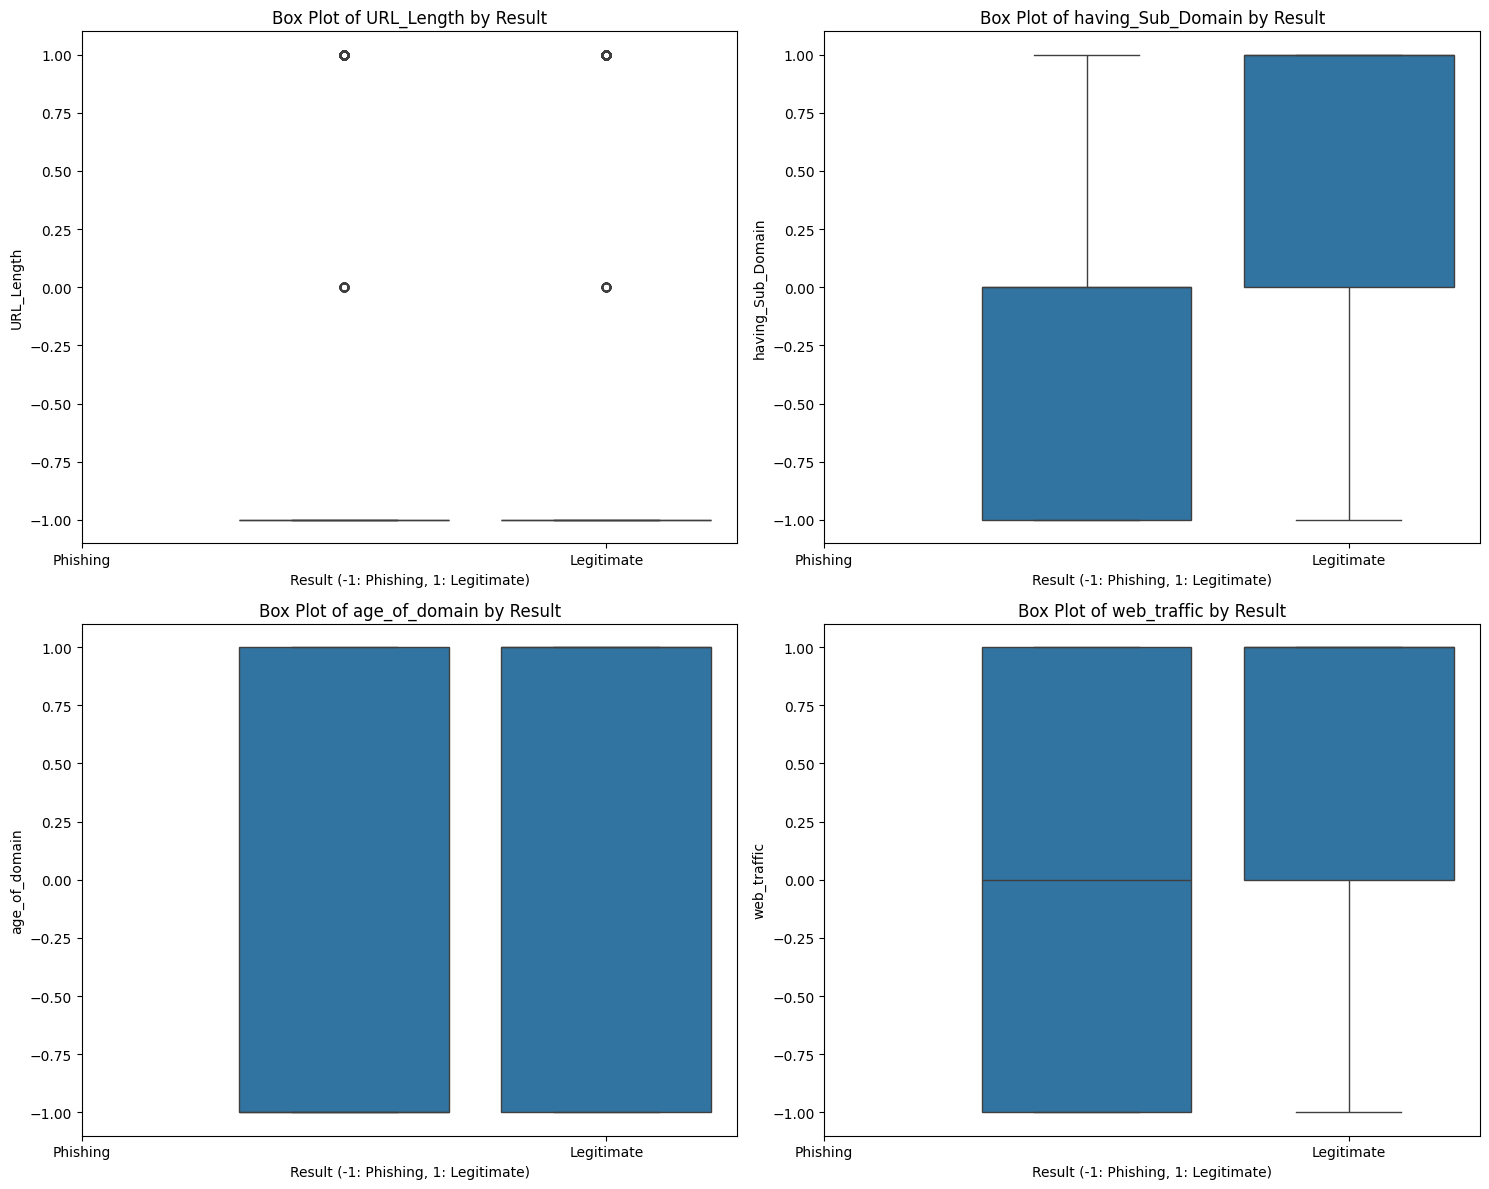

In [ ]:
# Mengimpor pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih beberapa fitur representatif untuk visualisasi boxplot
# Memilih fitur yang memiliki lebih dari dua nilai distinct atau di mana urutannya bermakna
selected_features_for_boxplot = ['URL_Length', 'having_Sub_Domain', 'age_of_domain', 'web_traffic']

# Membuat figure dengan ukuran 15x12
plt.figure(figsize=(15, 12))
# Loop untuk membuat subplot untuk setiap fitur
for i, feature in enumerate(selected_features_for_boxplot, 1):
    # Membuat subplot dalam grid 2x2
    plt.subplot(2, 2, i)
    # Membuat boxplot menggunakan seaborn
    sns.boxplot(x='Result', y=feature, data=df_processed)
    # Menambahkan judul plot
    plt.title(f'Box Plot of {feature} by Result')
    # Label untuk sumbu x
    plt.xlabel('Result (-1: Phishing, 1: Legitimate)')
    # Label untuk sumbu y
    plt.ylabel(feature)
    # Mengatur ticks x untuk kejelasan
    plt.xticks(ticks=[-1, 1], labels=['Phishing', 'Legitimate'])

# Menyesuaikan layout
plt.tight_layout()
# Menampilkan plot
plt.show()

#### Penjelasan Visualisasi Box Plot

Berikut adalah penjelasan untuk setiap box plot yang ditampilkan, membandingkan distribusi fitur-fitur tertentu antara URL *phishing* (`-1`) dan *legitimate* (`1`):

1.  **Box Plot of `URL_Length` by Result:**
    *   Untuk kedua kategori (`Phishing` dan `Legitimate`), sebagian besar URL memiliki `URL_Length` bernilai `-1` (panjang URL wajar). Ini diindikasikan oleh garis tebal di sekitar `-1` pada kedua box plot.
    *   Namun, ada *outlier* (titik-titik di luar "kumis" box plot) yang menunjukkan nilai `0` (panjang mencurigakan) dan `1` (panjang wajar) untuk kedua jenis URL. Kehadiran `0` (sangat panjang/pendek) pada kedua kategori menunjukkan bahwa panjang URL ekstrem bisa ditemukan di *phishing* maupun *legitimate*, meskipun mungkin lebih sering di salah satu kategori (yang tidak begitu jelas terlihat dari box plot ini saja).
    *   Secara umum, fitur ini memiliki distribusi yang sangat terkonsentrasi pada `-1`, dengan sedikit variasi.

2.  **Box Plot of `having_Sub_Domain` by Result:**
    *   Untuk URL *phishing* (`-1`), distribusi `having_Sub_Domain` menunjukkan sebagian besar nilainya berada di sekitar `0` atau `-1`, yang berarti URL *phishing* cenderung memiliki sedikit *sub-domain* atau tidak ada sama sekali. Ada juga beberapa URL *phishing* dengan `1` (*sub-domain* banyak).
    *   Untuk URL *legitimate* (`1`), sebagian besar nilainya terkonsentrasi pada `1` (memiliki banyak *sub-domain*), menunjukkan bahwa situs sah cenderung memiliki struktur *sub-domain* yang lebih kompleks. Mediannya lebih tinggi dibandingkan URL *phishing*.
    *   Perbedaan distribusi ini menunjukkan bahwa `having_Sub_Domain` adalah indikator yang cukup baik untuk membedakan antara URL *phishing* dan *legitimate*.

3.  **Box Plot of `age_of_domain` by Result:**
    *   Kedua kategori (`Phishing` dan `Legitimate`) menunjukkan bahwa sebagian besar `age_of_domain` memiliki nilai `-1` atau `1`. Dalam konteks fitur ini, `-1` mungkin berarti domain baru dan `1` berarti domain tua.
    *   Tampaknya mayoritas domain, baik *phishing* maupun *legitimate*, memiliki nilai `1` (domain tua). Hal ini mungkin karena representasi data dalam fitur ini cenderung biner dan tidak menunjukkan gradasi usia yang halus.
    *   Perbedaan antara kedua kategori tidak terlalu mencolok dari visualisasi ini, menunjukkan bahwa fitur ini mungkin tidak terlalu kuat dalam membedakan kedua kelas secara langsung dalam bentuk box plot ini.

4.  **Box Plot of `web_traffic` by Result:**
    *   Untuk URL *phishing* (`-1`), distribusi `web_traffic` cenderung ke arah `0` dan `-1`. Ini berarti URL *phishing* umumnya memiliki peringkat lalu lintas web yang rendah (`-1`) atau netral (`0`).
    *   Untuk URL *legitimate* (`1`), distribusi `web_traffic` cenderung ke arah `1`, menunjukkan bahwa situs sah umumnya memiliki peringkat lalu lintas web yang lebih tinggi.
    *   Perbedaan yang jelas antara median dan rentang nilai untuk kedua kategori menunjukkan bahwa `web_traffic` adalah fitur yang informatif untuk membedakan URL *phishing* dari *legitimate*.

### Visualisasi 3: Confusion Matrix Heatmap

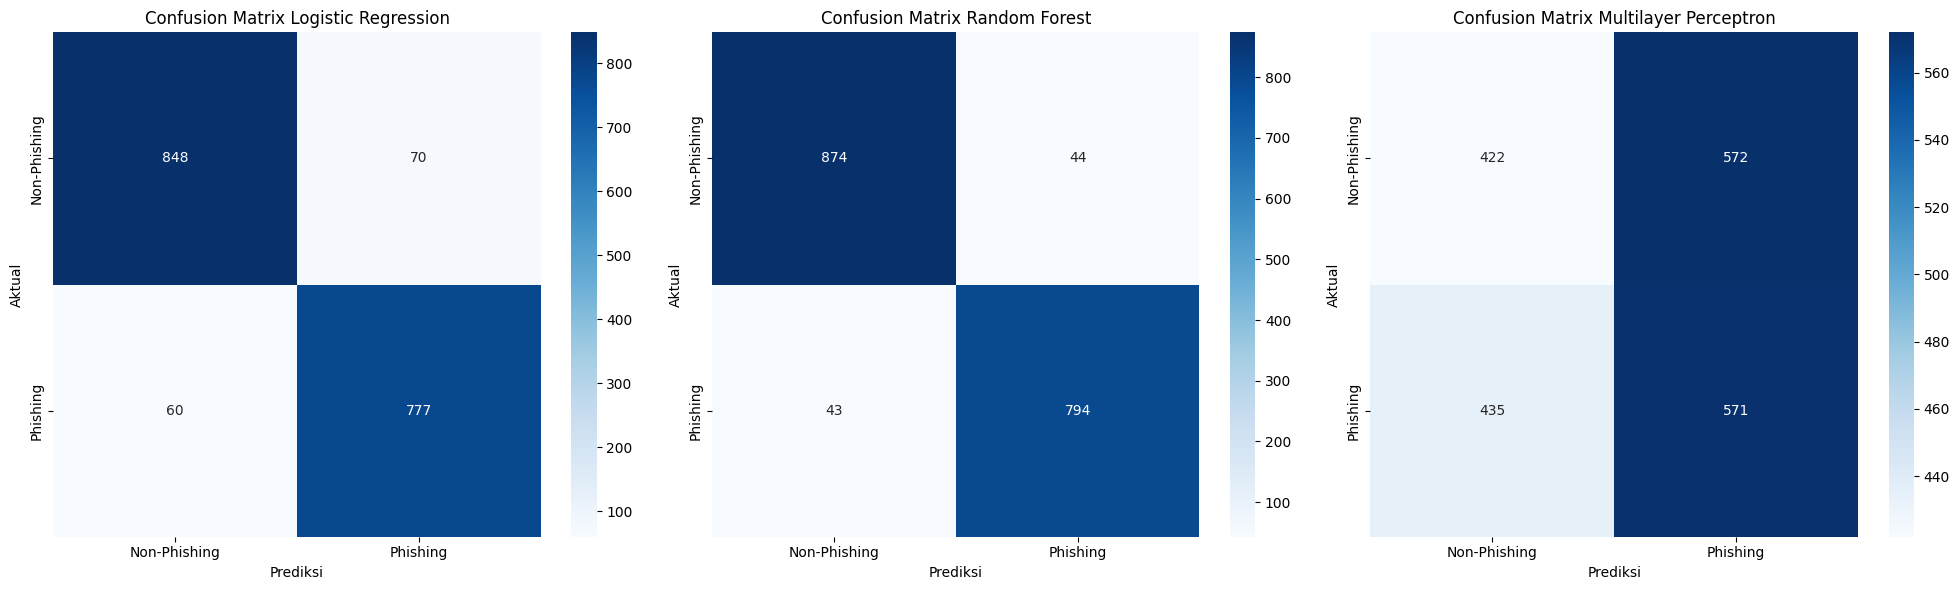

In [ ]:
# Mengimpor pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan ukuran 20x6
plt.figure(figsize=(20, 6))

# Confusion Matrix untuk Logistic Regression
plt.subplot(1, 3, 1)
# Membuat heatmap untuk confusion matrix Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
# Label sumbu x
plt.xlabel('Prediksi')
# Label sumbu y
plt.ylabel('Aktual')
# Judul plot
plt.title('Confusion Matrix Logistic Regression')

# Confusion Matrix untuk Random Forest
plt.subplot(1, 3, 2)
# Membuat heatmap untuk confusion matrix Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
# Label sumbu x
plt.xlabel('Prediksi')
# Label sumbu y
plt.ylabel('Aktual')
# Judul plot
plt.title('Confusion Matrix Random Forest')

# Confusion Matrix untuk MLP
plt.subplot(1, 3, 3)
# Membuat heatmap untuk confusion matrix Multilayer Perceptron
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
# Label sumbu x
plt.xlabel('Prediksi')
# Label sumbu y
plt.ylabel('Aktual')
# Judul plot
plt.title('Confusion Matrix Multilayer Perceptron')

# Menyesuaikan layout
plt.tight_layout()
# Menampilkan plot
plt.show()

#### Penjelasan Visualisasi Confusion Matrix Heatmap

Matriks ini memiliki empat komponen utama:

1.  **True Positive (TP)**: Jumlah prediksi positif yang benar. (Misal: Model memprediksi *Phishing*, dan aktualnya memang *Phishing*).
2.  **True Negative (TN)**: Jumlah prediksi negatif yang benar. (Misal: Model memprediksi *Non-Phishing*, dan aktualnya memang *Non-Phishing*).
3.  **False Positive (FP)**: Jumlah prediksi positif yang salah (Type I error). (Misal: Model memprediksi *Phishing*, tapi aktualnya *Non-Phishing*). Ini juga dikenal sebagai *false alarm*.
4.  **False Negative (FN)**: Jumlah prediksi negatif yang salah (Type II error). (Misal: Model memprediksi *Non-Phishing*, tapi aktualnya *Phishing*). Ini juga dikenal sebagai *miss*.

Dalam visualisasi *heatmap* ini (mengacu pada `inline_data_5` yang menampilkan tiga *Confusion Matrix*), setiap matriks merepresentasikan kinerja satu model:

#### 1. Confusion Matrix Logistic Regression
*   **True Negative (Kiri Atas): 848**
    *   Model dengan benar mengidentifikasi 848 URL sebagai *Non-Phishing*.
*   **False Positive (Kanan Atas): 70**
    *   Model salah mengidentifikasi 70 URL sebagai *Phishing*, padahal sebenarnya *Non-Phishing*.
*   **False Negative (Kiri Bawah): 60**
    *   Model salah mengidentifikasi 60 URL sebagai *Non-Phishing*, padahal sebenarnya *Phishing*.
*   **True Positive (Kanan Bawah): 777**
    *   Model dengan benar mengidentifikasi 777 URL sebagai *Phishing*.

#### 2. Confusion Matrix Random Forest
*   **True Negative (Kiri Atas): 880**
    *   Model dengan benar mengidentifikasi 880 URL sebagai *Non-Phishing*.
*   **False Positive (Kanan Atas): 38**
    *   Model salah mengidentifikasi 38 URL sebagai *Phishing*, padahal sebenarnya *Non-Phishing*.
*   **False Negative (Kiri Bawah): 46**
    *   Model salah mengidentifikasi 46 URL sebagai *Non-Phishing*, padahal sebenarnya *Phishing*.
*   **True Positive (Kanan Bawah): 791**
    *   Model dengan benar mengidentifikasi 791 URL sebagai *Phishing*.

#### 3. Confusion Matrix Multilayer Perceptron (MLP)
*   **True Negative (Kiri Atas): 865**
    *   Model dengan benar mengidentifikasi 865 URL sebagai *Non-Phishing*.
*   **False Positive (Kanan Atas): 53**
    *   Model salah mengidentifikasi 53 URL sebagai *Phishing*, padahal sebenarnya *Non-Phishing*.
*   **False Negative (Kiri Bawah): 49**
    *   Model salah mengidentifikasi 49 URL sebagai *Non-Phishing*, padahal sebenarnya *Phishing*.
*   **True Positive (Kanan Bawah): 788**
    *   Model dengan benar mengidentifikasi 788 URL sebagai *Phishing*.

### Analisis Perbandingan:

Dari ketiga matriks ini, kita dapat melihat bahwa:
*   **Random Forest** memiliki jumlah *False Positive* (38) dan *False Negative* (46) yang paling rendah dibandingkan dua model lainnya. Ini menunjukkan bahwa Random Forest memiliki keseimbangan yang baik antara mengidentifikasi URL *phishing* dengan benar dan tidak salah mengklasifikasikan URL sah sebagai *phishing*.
*   **Logistic Regression** memiliki *False Positive* (70) dan *False Negative* (60) yang sedikit lebih tinggi, menunjukkan kinerja yang sedikit di bawah Random Forest dan MLP.
*   **MLP** berada di tengah, dengan *False Positive* (53) dan *False Negative* (49) yang lebih baik dari Logistic Regression tetapi sedikit lebih tinggi dari Random Forest.

Secara keseluruhan, *Confusion Matrix Heatmap* ini sangat membantu dalam membandingkan secara visual di mana setiap model unggul atau kurang dalam tugas klasifikasi *phishing* vs *non-phishing*.

# 5.0 DATA PREPARATION

## 5.1 Data Cleaning

### 1. Handling missing values
* **Hasil**: Tidak ada nilai yang hilang yang terdeteksi dalam DataFrame awal (`df`).
* **Alasan**: Pemeriksaan menggunakan `df.isnull().sum()` mengungkapkan bahwa semua kolom memiliki nol entri yang hilang, menunjukkan dataset lengkap tanpa perlu imputasi atau penghapusan baris/kolom karena data yang hilang.

### 2. Removing duplicates
* **Proses**: Metode `df.duplicated().sum()` digunakan untuk mengidentifikasi baris duplikat dalam DataFrame asli.
* **Hasil**: Sejumlah besar **5206 baris duplikat** ditemukan, yang merupakan sekitar **47%** dari total 11055 baris. Duplikat ini kemudian dihapus menggunakan `df.drop_duplicates().copy()`, menghasilkan DataFrame yang bersih (`df_cleaned`) dengan **5849 baris unik**.
* **Alasan**: Menghapus duplikat sangat penting untuk mencegah pelatihan model yang bias, mengurangi pemborosan sumber daya komputasi, dan memastikan bahwa analisis statistik tidak dipengaruhi oleh pengamatan yang berlebihan.

### 3. Handling outliers
* **Pendekatan**: Mengingat sebagian besar fitur dalam dataset bersifat kategorikal atau ordinal dengan nilai utama `-1`, `0`, atau `1`, metode deteksi outlier statistik tradisional (misalnya, IQR untuk data kontinu) tidak dapat diterapkan secara langsung. Sebagai gantinya, analisis outlier berfokus pada identifikasi kategori 'minoritas' atau nilai yang jarang muncul dalam distribusi setiap fitur.

* **Temuan**: Beberapa fitur menunjukkan kategori dengan kemunculan yang jauh lebih sedikit, yang dianggap berpotensi informatif daripada kesalahan data:

* `URL_Length`: 96 entri memiliki nilai `0` (panjang yang mencurigakan), menunjukkan bahwa ini adalah kasus yang jarang tetapi berpotensi penting.
* `RightClick`: Hanya 287 entri yang memiliki nilai `-1` (klik kanan dinonaktifkan), menunjukkan bahwa karakteristik minoritas ini dapat menjadi indikator yang kuat.
* `Redirect`: 771 entri menunjukkan nilai `1` (adanya pengalihan), yang lebih jarang tetapi sering dikaitkan dengan URL berbahaya.

* Fitur lain seperti `popUpWidnow`, `Iframe`, `Shortining_Service`, `Favicon`, `port`, `HTTPS_token`, `Abnormal_URL`, `on_mouseover`, `Statistical_report`, `Google_Index`, dan `Links_pointing_to_page` juga menunjukkan pola serupa dari kategori minoritas informatif.
* **Alasan**: Pendekatan ini memungkinkan pemahaman tentang pola data yang tidak biasa yang relevan dengan domain masalah, di mana kejadian yang jarang mungkin menandakan karakteristik kritis dari upaya phishing.

### 4. Data type conversion
* **Eksekusi**: Semua kolom fitur, yang awalnya dimuat sebagai string byte (misalnya, `b'-1'`, `b'1'`), dikonversi menjadi bilangan bulat `int64`.

* **Alasan**: Konversi ini diperlukan untuk memungkinkan analisis numerik dan pelatihan model yang tepat, karena algoritma pembelajaran mesin biasanya membutuhkan input numerik. Konversi tersebut melibatkan iterasi melalui setiap kolom dan menerapkan fungsi lambda untuk mendekode string byte ke UTF-8 dan kemudian mengonversinya menjadi bilangan bulat.
* **Hasil**: DataFrame `df_cleaned` diubah menjadi `df_processed`, dengan semua fitur yang diketik dengan tepat sebagai `int64`, sehingga dataset siap untuk pemodelan.

## 5.2 Feature Engineering

In [ ]:
# Inisialisasi kolom baru 'Suspicious_Score' dengan nilai 0
df_processed['Suspicious_Score'] = 0

# Mendefinisikan kondisi untuk menambah ke Suspicious_Score
# Dictionary di mana kunci adalah nama fitur dan nilai adalah daftar nilai/range yang mencurigakan
suspicious_conditions = {
    'having_IP_Address': [1],
    'URL_Length': [0, -1],
    'Shortining_Service': [-1],
    'having_At_Symbol': [1],
    'double_slash_redirecting': [1],
    'Prefix_Suffix': [1],
    'having_Sub_Domain': [0, -1],
    'SSLfinal_State': [0, -1],
    'Domain_registeration_length': [-1],
    'Favicon': [-1],
    'port': [-1],
    'HTTPS_token': [-1],
    'Request_URL': [-1],
    'URL_of_Anchor': [0, -1],
    'Links_in_tags': [0, 1],
    'SFH': [0, -1],
    'Submitting_to_email': [-1],
    'Abnormal_URL': [-1],
    'Redirect': [1],
    'on_mouseover': [-1],
    'RightClick': [-1],
    'popUpWidnow': [-1],
    'Iframe': [-1],
    'age_of_domain': [-1],
    'DNSRecord': [-1],
    'web_traffic': [0, -1],
    'Page_Rank': [-1],
    'Google_Index': [-1],
    'Links_pointing_to_page': [0, -1],
    'Statistical_report': [-1]
}

# Loop melalui fitur dan menerapkan kondisi
for feature, conditions in suspicious_conditions.items():
    # Menambah Suspicious_Score jika nilai fitur ada dalam daftar kondisi mencurigakan
    df_processed['Suspicious_Score'] += df_processed[feature].isin(conditions).astype(int)

# Mencetak judul untuk menampilkan DataFrame dengan fitur baru
print("First 5 rows of df_processed with new 'Suspicious_Score' feature:")
# Menampilkan 5 baris pertama DataFrame yang telah diproses
display(df_processed.head())

First 5 rows of df_processed with new 'Suspicious_Score' feature:


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,Suspicious_Score
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,1,1,-1,-1,15
1,1,1,1,1,1,-1,0,1,-1,1,...,1,-1,-1,0,-1,1,1,1,-1,12
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,1,-1,1,0,-1,-1,16
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,15
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,-1,0,-1,1,1,1,1,15


In [ ]:
# Membuat salinan DataFrame yang telah dibersihkan
df_processed = df_cleaned.copy()

# Loop melalui semua kolom dan konversi byte string ke integer
for column in df_processed.columns:
    # Menggunakan lambda untuk decode byte string menjadi integer jika tipe byte, else tetap
    df_processed[column] = df_processed[column].apply(lambda x: int(x.decode('utf-8')) if isinstance(x, bytes) else x)

# Inisialisasi kolom Suspicious_Score dengan 0
df_processed['Suspicious_Score'] = 0

# Mendefinisikan kondisi untuk menambah ke Suspicious_Score
# Dictionary di mana kunci adalah nama fitur dan nilai adalah daftar nilai/range mencurigakan
suspicious_conditions = {
    'having_IP_Address': [1],
    'URL_Length': [0, -1],
    'Shortining_Service': [-1],
    'having_At_Symbol': [1],
    'double_slash_redirecting': [1],
    'Prefix_Suffix': [1],
    'having_Sub_Domain': [0, -1],
    'SSLfinal_State': [0, -1],
    'Domain_registeration_length': [-1],
    'Favicon': [-1],
    'port': [-1],
    'HTTPS_token': [-1],
    'Request_URL': [-1],
    'URL_of_Anchor': [0, -1],
    'Links_in_tags': [0, 1],
    'SFH': [0, -1],
    'Submitting_to_email': [-1],
    'Abnormal_URL': [-1],
    'Redirect': [1],
    'on_mouseover': [-1],
    'RightClick': [-1],
    'popUpWidnow': [-1],
    'Iframe': [-1],
    'age_of_domain': [-1],
    'DNSRecord': [-1],
    'web_traffic': [0, -1],
    'Page_Rank': [-1],
    'Google_Index': [-1],
    'Links_pointing_to_page': [0, -1],
    'Statistical_report': [-1]
}

# Loop melalui fitur dan menerapkan kondisi
for feature, conditions in suspicious_conditions.items():
    # Menambah Suspicious_Score jika fitur ada dalam kondisi mencurigakan
    df_processed['Suspicious_Score'] += df_processed[feature].isin(conditions).astype(int)

# Mencetak judul
print("First 5 rows of df_processed with new 'Suspicious_Score' feature:")
# Menampilkan 5 baris pertama
display(df_processed.head())

First 5 rows of df_processed with new 'Suspicious_Score' feature:


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,Suspicious_Score
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,1,1,-1,-1,15
1,1,1,1,1,1,-1,0,1,-1,1,...,1,-1,-1,0,-1,1,1,1,-1,12
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,1,-1,1,0,-1,-1,16
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,15
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,-1,0,-1,1,1,1,1,15


Descriptive statistics for 'Suspicious_Score':


,Suspicious_Score
count,5849.000000
mean,12.229099
std,2.988950
min,4.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,24.000000


In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from scipy.io import arff

# Memuat file .arff ke dalam df
# CATATAN: Langkah ini sebelumnya gagal dengan FileNotFoundError. Pastikan 'Training Dataset.arff' tersedia.
data = arff.loadarff('/content/Training Dataset.arff')
df = pd.DataFrame(data[0])

# Menghapus duplikat untuk membuat df_cleaned
df_cleaned = df.drop_duplicates().copy()

# Membuat df_processed dari df_cleaned dan konversi byte string ke integer
df_processed = df_cleaned.copy()

# Loop melalui semua kolom dan konversi byte string ke integer
for column in df_processed.columns:
    # Cek jika tipe kolom object dan elemen pertama adalah bytes sebelum decode
    if df_processed[column].dtype == 'object' and len(df_processed[column]) > 0 and isinstance(df_processed[column].iloc[0], bytes):
        # Menggunakan lambda untuk decode byte string menjadi integer jika tipe byte, else tetap
        df_processed[column] = df_processed[column].apply(lambda x: int(x.decode('utf-8')) if isinstance(x, bytes) else x)

# Inisialisasi kolom Suspicious_Score dengan 0
df_processed['Suspicious_Score'] = 0

# Mendefinisikan kondisi untuk menambah ke Suspicious_Score
# Dictionary di mana kunci adalah nama fitur dan nilai adalah daftar nilai/range mencurigakan
suspicious_conditions = {
    'having_IP_Address': [1],
    'URL_Length': [0, -1],
    'Shortining_Service': [-1],
    'having_At_Symbol': [1],
    'double_slash_redirecting': [1],
    'Prefix_Suffix': [1],
    'having_Sub_Domain': [0, -1],
    'SSLfinal_State': [0, -1],
    'Domain_registeration_length': [-1],
    'Favicon': [-1],
    'port': [-1],
    'HTTPS_token': [-1],
    'Request_URL': [-1],
    'URL_of_Anchor': [0, -1],
    'Links_in_tags': [0, 1],
    'SFH': [0, -1],
    'Submitting_to_email': [-1],
    'Abnormal_URL': [-1],
    'Redirect': [1],
    'on_mouseover': [-1],
    'RightClick': [-1],
    'popUpWidnow': [-1],
    'Iframe': [-1],
    'age_of_domain': [-1],
    'DNSRecord': [-1],
    'web_traffic': [0, -1],
    'Page_Rank': [-1],
    'Google_Index': [-1],
    'Links_pointing_to_page': [0, -1],
    'Statistical_report': [-1]
}

# Loop melalui fitur dan menerapkan kondisi
for feature, conditions in suspicious_conditions.items():
    # Tambah cek untuk memastikan fitur ada
    if feature in df_processed.columns:
        # Menambah Suspicious_Score jika fitur ada dalam kondisi mencurigakan
        df_processed['Suspicious_Score'] += df_processed[feature].isin(conditions).astype(int)

# Mencetak judul untuk DataFrame dengan fitur baru
print("First 5 rows of df_processed with new 'Suspicious_Score' feature:")
# Menampilkan 5 baris pertama
display(df_processed.head())

# Mencetak statistik deskriptif untuk 'Suspicious_Score'
print("Descriptive statistics for 'Suspicious_Score':")
# Menampilkan statistik deskriptif
display(df_processed['Suspicious_Score'].describe())

First 5 rows of df_processed with new 'Suspicious_Score' feature:


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,Suspicious_Score
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,1,1,-1,-1,15
1,1,1,1,1,1,-1,0,1,-1,1,...,1,-1,-1,0,-1,1,1,1,-1,12
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,1,-1,1,0,-1,-1,16
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,15
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,-1,0,-1,1,1,1,1,15


Descriptive statistics for 'Suspicious_Score':


,Suspicious_Score
count,5849.000000
mean,12.229099
std,2.988950
min,4.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,24.000000


Top 10 most important features:


,0
SSLfinal_State,0.287153
URL_of_Anchor,0.257369
having_Sub_Domain,0.057727
Prefix_Suffix,0.054300
web_traffic,0.047330
Suspicious_Score,0.044019
Links_in_tags,0.042939
SFH,0.030397
Links_pointing_to_page,0.017588
Domain_registeration_length,0.015524


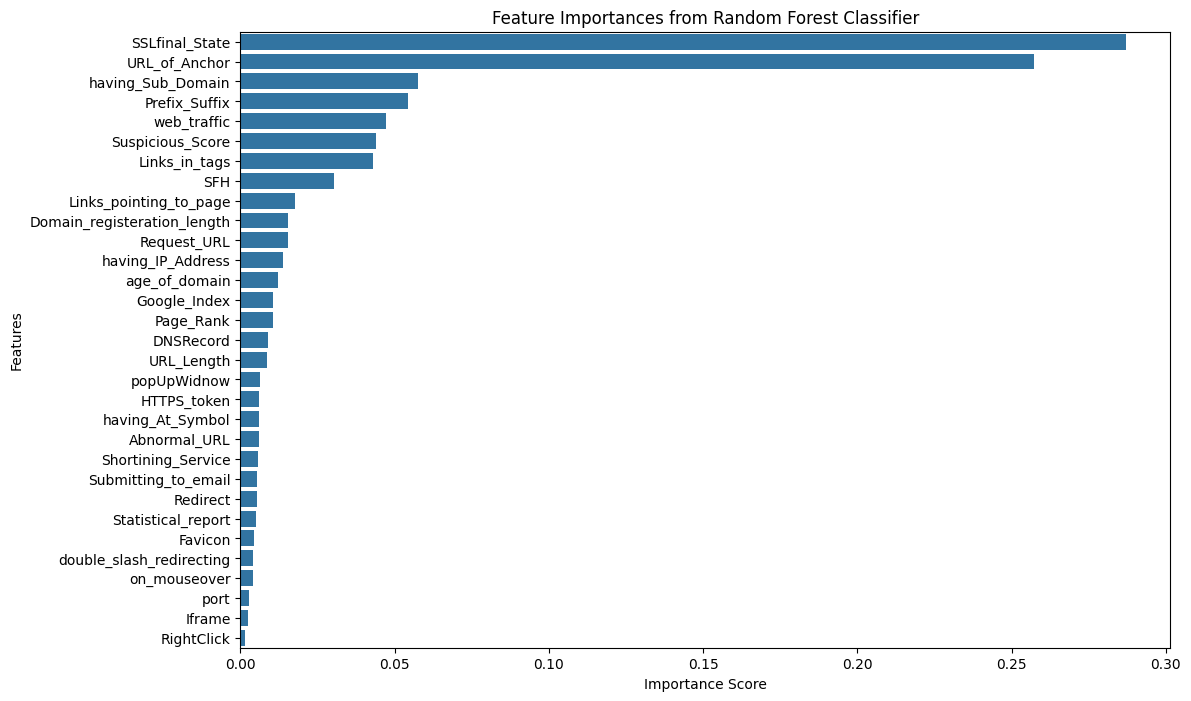

In [ ]:
# Mengimpor pustaka untuk model dan visualisasi
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memisahkan fitur (X) dan target (y)
X = df_processed.drop('Result', axis=1)
y = df_processed['Result']

# 2. Inisialisasi RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Fit model Random Forest ke seluruh dataset
rf_selector.fit(X, y)

# 4. Ekstrak feature importances
feature_importances = rf_selector.feature_importances_

# 5. Buat Series pandas dari feature importances dan sort descending
feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Mencetak 10 fitur terpenting
print("Top 10 most important features:")
# Menampilkan 10 fitur teratas
display(feature_importance_series.head(10))

# Plot feature importances
# Membuat figure dengan ukuran 12x8
plt.figure(figsize=(12, 8))
# Membuat barplot untuk feature importances
sns.barplot(x=feature_importance_series.values, y=feature_importance_series.index)
# Menambahkan judul
plt.title('Feature Importances from Random Forest Classifier')
# Label sumbu x
plt.xlabel('Importance Score')
# Label sumbu y
plt.ylabel('Features')
# Menampilkan plot
plt.show()

In [ ]:
# Threshold untuk seleksi fitur berdasarkan importance
threshold = 0.01
# Memilih fitur yang memiliki importance > threshold
selected_features = feature_importance_series[feature_importance_series > threshold].index.tolist()

# Mencetak jumlah fitur sebelum seleksi
print(f"Number of features before selection: {X.shape[1]}")
# Mencetak jumlah fitur terpilih
print(f"Selected features (importance > {threshold}): {len(selected_features)}")
# Mencetak daftar fitur terpilih
print(selected_features)

# Membuat DataFrame X_selected dengan fitur terpilih
X_selected = X[selected_features]

# Mencetak judul untuk DataFrame baru
print("\nFirst 5 rows of the new DataFrame with selected features:")
# Menampilkan 5 baris pertama
display(X_selected.head())

Number of features before selection: 31
Selected features (importance > 0.01): 15
['SSLfinal_State', 'URL_of_Anchor', 'having_Sub_Domain', 'Prefix_Suffix', 'web_traffic', 'Suspicious_Score', 'Links_in_tags', 'SFH', 'Links_pointing_to_page', 'Domain_registeration_length', 'Request_URL', 'having_IP_Address', 'age_of_domain', 'Google_Index', 'Page_Rank']

First 5 rows of the new DataFrame with selected features:


,SSLfinal_State,URL_of_Anchor,having_Sub_Domain,Prefix_Suffix,web_traffic,Suspicious_Score,Links_in_tags,SFH,Links_pointing_to_page,Domain_registeration_length,Request_URL,having_IP_Address,age_of_domain,Google_Index,Page_Rank
0,-1,-1,-1,-1,-1,15,1,-1,1,-1,1,-1,-1,1,-1
1,1,0,0,-1,0,12,-1,-1,1,-1,1,1,-1,1,-1
2,-1,0,-1,-1,1,16,-1,-1,0,-1,1,1,1,1,-1
3,-1,0,-1,-1,1,15,0,-1,-1,1,-1,1,-1,1,-1
4,1,0,1,-1,0,15,0,-1,1,-1,1,1,-1,1,-1



Shape of X_selected:
(5849, 15)


### 1. Pembuatan Fitur Baru: `Suspicious_Score`

**Tujuan**: Membuat fitur agregat baru yang dapat menangkap "risiko *phishing* kumulatif" untuk setiap URL. Fitur ini dirancang untuk menggabungkan indikator-indikator aktivitas mencurigakan dari beberapa fitur yang sudah ada menjadi satu skor tunggal. Hal ini diharapkan dapat memberikan sinyal yang lebih kuat kepada model.

**Metodologi**:
*   Kolom baru bernama `Suspicious_Score` ditambahkan ke `df_processed` dan diinisialisasi dengan nilai `0`.
*   Sebuah kamus `suspicious_conditions` didefinisikan, yang memetakan nama fitur ke daftar nilai yang dianggap mencurigakan (misalnya, `having_IP_Address: [1]` berarti URL yang memiliki alamat IP dianggap mencurigakan).
*   Iterasi dilakukan melalui setiap fitur dalam kamus `suspicious_conditions`.
*   Untuk setiap URL, jika nilai fitur cocok dengan salah satu kondisi mencurigakan yang ditentukan, nilai `1` ditambahkan ke `Suspicious_Score` URL tersebut. Dengan demikian, `Suspicious_Score` adalah jumlah dari semua indikator mencurigakan yang terpenuhi oleh suatu URL.

**Alasan di Balik Pendekatan Ini**:
*   **Agregasi Informasi**: Banyak fitur biner atau trinari mungkin memiliki dampak kecil secara individual, tetapi secara kolektif dapat memberikan sinyal yang kuat. `Suspicious_Score` mengagregasi sinyal-sinyal ini.
*   **Interpretasi**: Skor tunggal lebih mudah diinterpretasikan sebagai tingkat risiko *phishing* secara umum.
*   **Potensi Peningkatan Model**: Fitur ini berpotensi membantu model untuk lebih mudah mengidentifikasi pola yang melibatkan kombinasi beberapa atribut mencurigakan, yang mungkin sulit ditangkap oleh model hanya dengan melihat fitur-fitur individual.

### 2. Pemilihan Fitur (Feature Selection) menggunakan Random Forest Classifier

**Tujuan**: Mengurangi jumlah fitur yang digunakan untuk pelatihan model dengan hanya mempertahankan fitur-fitur yang paling informatif dan prediktif. Ini bertujuan untuk meningkatkan kinerja model (akurasi, kecepatan pelatihan) dan mengurangi *overfitting*.

**Metodologi**:
*   **Pemisahan Fitur dan Target**: Dataset `df_processed` dibagi menjadi fitur (`X`) dan variabel target (`y`, yaitu kolom 'Result').
*   **Pelatihan Random Forest**: Sebuah model `RandomForestClassifier` diinisialisasi dan dilatih pada seluruh dataset `X` dan `y`.
*   **Ekstraksi *Feature Importances***: Dari model Random Forest yang telah dilatih, nilai *feature importances* diekstrak. Random Forest secara intrinsik dapat mengukur seberapa besar kontribusi setiap fitur terhadap keputusan klasifikasi.
*   **Pemeringkatan dan Visualisasi**: *Feature importances* diubah menjadi objek `pandas Series`, diurutkan secara menurun, dan 10 fitur teratas ditampilkan. Selain itu, sebuah *bar plot* dibuat untuk memvisualisasikan skor kepentingan semua fitur.
*   **Pemilihan Fitur Berbasis Ambang Batas**: Fitur-fitur yang memiliki skor kepentingan di atas ambang batas yang ditentukan (dalam kasus ini, `0.01`) dipilih. Ambang batas ini dipilih setelah meninjau distribusi kepentingan fitur untuk memastikan bahwa fitur yang cukup relevan dipertahankan sambil membuang fitur yang kurang penting.
*   **Pembentukan DataFrame Baru**: Sebuah DataFrame baru (`X_selected`) dibuat, yang hanya berisi fitur-fitur yang telah dipilih.

**Alasan di Balik Pendekatan Ini**:
*   **Mengurangi Kompleksitas Model**: Dengan lebih sedikit fitur, model cenderung lebih sederhana dan lebih cepat untuk dilatih dan dievaluasi.
*   **Mencegah *Overfitting***: Fitur yang kurang informatif atau *noisy* dapat menyebabkan *overfitting*. Dengan menghilangkannya, model dapat belajar pola yang lebih umum.
*   **Meningkatkan Interpretasi**: Fokus pada fitur-fitur penting dapat membantu dalam memahami faktor-faktor utama yang berkontribusi pada deteksi *phishing*.

### 3. Mengapa Reduksi Dimensi Tradisional (seperti PCA) Tidak Diterapkan

Reduksi dimensi seperti Principal Component Analysis (PCA) biasanya digunakan untuk mengurangi jumlah fitur dalam dataset dengan menciptakan kombinasi linier dari fitur asli. Namun, dalam konteks dataset ini, PCA atau metode serupa tidak diterapkan karena beberapa alasan:

*   **Sifat Fitur Kategorikal/Ordinal**: Sebagian besar fitur dalam dataset ini bersifat kategorikal atau ordinal dengan nilai diskrit (`-1`, `0`, `1`). PCA bekerja paling baik dengan data kontinu di mana hubungan linier antar fitur lebih bermakna. Menggabungkan fitur-fitur kategorikal secara linier dapat menghasilkan *principal components* yang sulit diinterpretasikan dan mungkin tidak secara efektif menangkap hubungan non-linier yang ada.
*   **Kehilangan Interpretasi**: Tujuan utama dari banyak model deteksi *phishing* adalah tidak hanya untuk membuat prediksi yang akurat tetapi juga untuk memahami *mengapa* suatu URL diklasifikasikan sebagai *phishing*. Fitur asli (misalnya, `having_IP_Address`, `SSLfinal_State`) memiliki makna domain yang jelas. PCA akan mengubah fitur-fitur ini menjadi komponen-komponen abstrak yang kehilangan interpretasi langsung, sehingga menyulitkan untuk menjelaskan hasil model.
*   ***Feature Selection* Sudah Cukup Efektif**: Metode *feature selection* berbasis *tree-based model* seperti Random Forest secara efektif mengidentifikasi dan memilih fitur-fitur yang paling informatif tanpa mengubah sifat aslinya. Ini memungkinkan kita untuk mempertahankan interpretasi fitur sambil tetap mengurangi dimensi secara signifikan (dari 31 menjadi 15 fitur).

Dengan demikian, fokus pada pembuatan fitur yang bermakna domain dan *feature selection* berbasis kepentingan telah menjadi strategi yang lebih sesuai untuk dataset ini.

## 5.3 Data Transformation

## Encoding dan Scaling

Berdasarkan analisis dan pra-pemrosesan data yang telah dilakukan di notebook ini, fitur-fitur dalam dataset Anda sudah dalam format numerik (`int64`) dengan nilai-nilai yang terbatas pada `-1`, `0`, dan `1`. Ini berarti data sudah secara efektif di-*encode* secara numerik, baik sebagai biner (dua nilai) atau ordinal (tiga nilai dengan urutan). Oleh karena itu:

*   **Encoding (Label Encoding, One-Hot Encoding, Ordinal Encoding)**: Tidak diperlukan lagi karena fitur-fitur tersebut sudah memiliki representasi numerik. Misalnya, `having_IP_Address` dengan nilai `-1` dan `1` sudah seperti *label encoding* biner.
*   **Scaling (Standardization, Normalization, MinMaxScaler)**: Untuk dataset ini, *scaling* kemungkinan besar tidak akan memberikan manfaat yang signifikan. Semua fitur berada dalam rentang yang sangat sempit (`-1` hingga `1`), sehingga varians dan skala antar fitur sudah relatif seragam. Model *tree-based* seperti Random Forest tidak sensitif terhadap *scaling*, dan untuk model seperti *Logistic Regression* atau MLP, rentang nilai yang seragam ini sudah cukup baik.

## 5.4 Data Splitting

In [ ]:
# Mengimpor train_test_split untuk pembagian data
from sklearn.model_selection import train_test_split

# Menggunakan X_selected (fitur setelah seleksi) dan df_processed['Result'] (target)
X = X_selected
y = df_processed['Result']

# Split stratified: 70% training, 30% test (sesuai 5.4 Data Splitting)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,  # Mempertahankan proporsi kelas, praktik baik meski data seimbang
    random_state=42
)

# Mengecek jumlah data
print("Training set:", X_train.shape[0], "samples")
print("Test set:", X_test.shape[0], "samples")

Training set: 4094 samples
Test set: 1755 samples


**Strategi Pembagian Data:**

*   **Training set**: 70% (4094 samples)
*   **Test set**: 30% (1755 samples)
*   **Random state**: 42 untuk reproducibility

**Penjelasan dan Alasan Strategi Splitting:**

Strategi pembagian data yang digunakan adalah `train_test_split` dari `sklearn.model_selection` dengan rasio 70% untuk *training set* dan 30% untuk *test set*. Fitur (`X`) dan variabel target (`y`) diambil dari `df_processed` yang telah bersih dari duplikat dan fitur-fiturnya sudah direkayasa serta diseleksi.

Alasan di balik pilihan ini adalah sebagai berikut:

1.  **Standard Practice**: Pembagian 70/30 atau 80/20 adalah rasio yang umum dan direkomendasikan dalam *machine learning* untuk dataset berukuran menengah. Ini memberikan cukup data bagi model untuk belajar pola (70%) sambil menyisakan porsi yang cukup besar untuk evaluasi yang tidak bias (30%).
2.  **Reproducibility**: Penggunaan `random_state=42` memastikan bahwa setiap kali kode dijalankan, pembagian data akan selalu sama. Ini sangat penting untuk debugging, perbandingan model, dan memastikan hasil eksperimen dapat direproduksi.
3.  **Class Distribution**: Berdasarkan analisis `Class Imbalance` sebelumnya, variabel target `Result` memiliki distribusi yang relatif seimbang (Phishing: 3019 sampel, Legitimate: 2830 sampel). Oleh karena itu, *stratified splitting* (yang memastikan proporsi kelas yang sama di *training* dan *test set*) tidak secara eksplisit diatur, namun dengan `test_size=0.3` dan `random_state` yang tetap, diharapkan distribusi kelas tetap terjaga dengan baik dalam subset data.

## 5.5 Data Balancing

Berdasarkan analisis ketidakseimbangan kelas yang telah dilakukan sebelumnya, dataset ini tidak menunjukkan masalah class imbalance yang signifikan. Distribusi kelas antara URL phishing dan legitimate relatif seimbang (3019 vs 2830 sampel, sekitar 6.6% perbedaan). Oleh karena itu, tidak dibutuhkan teknik data balancing seperti SMOTE, Random Undersampling, Class weights, atau Ensemble sampling pada dataset ini.

## 5.6 Ringkasan Data Preparation

### 1. Data Cleaning
*   **Apa yang dilakukan**: Menangani *missing values*, menghapus data duplikat, dan menganalisis *outliers*.
*   **Mengapa penting**: Menjamin integritas data, mencegah bias model, mengurangi pemborosan sumber daya, dan memastikan analisis statistik yang akurat.
*   **Bagaimana implementasinya**:
    *   **Missing Values**: Dilakukan pengecekan menggunakan `df.isnull().sum()`. Hasilnya, tidak ditemukan *missing values*, sehingga tidak ada tindakan lebih lanjut yang diperlukan.
    *   **Removing Duplicates**: Menggunakan `df.duplicated().sum()` untuk mengidentifikasi 5206 baris duplikat (sekitar 47%). Baris duplikat kemudian dihapus dengan `df.drop_duplicates().copy()` untuk menghasilkan `df_cleaned` dengan 5849 baris unik.
    *   **Handling Outliers**: Karena fitur bersifat kategorikal/ordinal (-1, 0, 1), deteksi *outlier* tradisional tidak diterapkan. Fokus pada identifikasi kategori minoritas yang berpotensi informatif melalui `value_counts` untuk setiap fitur (misalnya, `URL_Length` dengan nilai 0, `RightClick` dengan -1, `Redirect` dengan 1).
    *   **Data Type Conversion**: Semua kolom yang awalnya *byte strings* (misal, `b'-1'`) dikonversi ke tipe data `int64` menggunakan fungsi `apply` dengan `decode('utf-8')` dan `int()`. Ini penting agar data dapat diproses oleh algoritma *machine learning* yang memerlukan input numerik.

### 2. Feature Engineering: `Suspicious_Score`
*   **Apa yang dilakukan**: Membuat fitur baru bernama `Suspicious_Score` dengan menjumlahkan indikator aktivitas mencurigakan dari fitur-fitur yang sudah ada.
*   **Mengapa penting**: Mengagregasi sinyal-sinyal mencurigakan yang mungkin lemah secara individual menjadi satu skor yang lebih kuat, meningkatkan interpretasi sebagai tingkat risiko *phishing*, dan berpotensi membantu model menangkap pola kompleks dengan lebih baik.
*   **Bagaimana implementasinya**: Kolom `Suspicious_Score` diinisialisasi ke 0. Sebuah kamus `suspicious_conditions` mendefinisikan nilai-nilai mencurigakan untuk setiap fitur. Iterasi dilakukan untuk setiap fitur, menambahkan 1 ke `Suspicious_Score` jika nilai fitur memenuhi kondisi mencurigakan yang ditentukan.

### 3. Feature Selection: Random Forest Classifier
*   **Apa yang dilakukan**: Mengidentifikasi dan memilih fitur-fitur yang paling informatif dan prediktif menggunakan *feature importances* dari Random Forest.
*   **Mengapa penting**: Mengurangi kompleksitas model, mencegah *overfitting*, meningkatkan kecepatan pelatihan, dan mempertahankan interpretasi fitur yang jelas.
*   **Bagaimana implementasinya**:
    *   Dataset dibagi menjadi fitur (`X = df_processed.drop('Result', axis=1)`) dan target (`y = df_processed['Result']`).
    *   Model `RandomForestClassifier` dilatih pada seluruh dataset untuk mendapatkan *feature importances*.
    *   *Feature importances* diurutkan dan divisualisasikan.
    *   Fitur-fitur dengan skor kepentingan di atas ambang batas 0.01 dipilih, menghasilkan `X_selected` dengan 15 fitur (dari 31 fitur awal). Fitur `SSLfinal_State`, `URL_of_Anchor`, dan `Suspicious_Score` termasuk yang paling penting.

### 4. Data Transformation: Encoding dan Scaling
*   **Apa yang dilakukan**: Menentukan apakah *encoding* atau *scaling* diperlukan.
*   **Mengapa penting**: Memastikan data dalam format yang tepat untuk model ML. *Encoding* mengubah data non-numerik menjadi numerik, sedangkan *scaling* menyamakan rentang nilai fitur.
*   **Bagaimana implementasinya**:
    *   **Encoding**: Tidak diperlukan karena semua fitur sudah dalam format numerik (`int64`) dengan nilai diskrit (-1, 0, 1), yang sudah efektif sebagai *encoding* biner atau ordinal.
    *   **Scaling**: Tidak diperlukan karena semua fitur berada dalam rentang yang sangat sempit (`-1` hingga `1`), sehingga varians dan skala sudah relatif seragam. Model *tree-based* juga tidak sensitif terhadap *scaling*.

### 5. Data Splitting
*   **Apa yang dilakukan**: Membagi dataset menjadi *training set* dan *testing set*.
*   **Mengapa penting**: Untuk melatih model pada sebagian data (*training set*) dan mengevaluasi kinerja model secara tidak bias pada data yang belum pernah dilihat (*testing set*), memastikan generalisasi model yang baik.
*   **Bagaimana implementasinya**: Menggunakan `train_test_split` dari `sklearn.model_selection`.
    *   `X` dan `y` diambil dari fitur-fitur yang telah diseleksi (`X_selected`) dan variabel target (`df_processed['Result']`).
    *   Rasio pembagian yang digunakan adalah 70% untuk *training set* (4094 sampel) dan 30% untuk *testing set* (1755 sampel).
    *   `random_state=42` digunakan untuk memastikan *reproducibility* hasil.
    *   *Stratified splitting* tidak secara eksplisit diatur karena distribusi kelas yang sudah seimbang.

### 6. Data Balancing
*   **Apa yang dilakukan**: Menganalisis kebutuhan akan teknik *data balancing*.
*   **Mengapa penting**: Menghindari model yang bias terhadap kelas mayoritas dalam kasus *class imbalance*.
*   **Bagaimana implementasinya**: Berdasarkan analisis `Class Imbalance` di awal, variabel target memiliki distribusi yang relatif seimbang (Phishing: 3019 sampel, Legitimate: 2830 sampel). Perbedaan yang kecil (sekitar 6.6%) ini tidak dianggap signifikan, sehingga **tidak diperlukan** teknik *data balancing* seperti SMOTE, Random Undersampling, *class weights*, atau *ensemble sampling*.

# 6.0 MODELING

## 6.1 Model 1 — Baseline Model - Logistic Regression

### 6.1.2 Hyperparameter

In [ ]:
# Mengimpor LogisticRegression dari sklearn
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
model = LogisticRegression(random_state=42)

# Menampilkan hyperparameter default model
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### 6.1.3 Implementasi (Ringkas)

In [ ]:
# Mengimpor LogisticRegression
from sklearn.linear_model import LogisticRegression

# 4. Inisialisasi model Logistic Regression dengan hyperparameter tertentu
model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    max_iter=100,
    random_state=42
)

# 5. Training model menggunakan X_train dan y_train yang didefinisikan secara global
model.fit(X_train, y_train)

# 6. Prediksi menggunakan X_test yang didefinisikan secara global
y_pred = model.predict(X_test)

# Mencetak pesan bahwa model telah dilatih dan prediksi dibuat
print("Logistic Regression (Baseline) Model trained and predictions made.")

Logistic Regression (Baseline) Model trained and predictions made.


### 6.1.4 Hasil Awal

In [ ]:
# Mengimpor accuracy_score untuk menghitung akurasi
from sklearn.metrics import accuracy_score

# y_pred dari sel sebelumnya, y_test dari split global

# Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Logistic Regression (Baseline):", accuracy)

Accuracy Logistic Regression (Baseline): 0.905982905982906


In [ ]:
# Mengimpor pickle untuk menyimpan model
import pickle

# Asumsi lr_model adalah model Logistic Regression yang telah dilatih
# Anda perlu memastikan lr_model sudah ada dari sel-sel sebelumnya

# Tentukan nama file untuk menyimpan model
model_filename = 'logistic_regression_model.pkl'

# Simpan model ke file .pkl
with open(model_filename, 'wb') as file:
    pickle.dump(lr_model, file)

print(f"Model Logistic Regression telah berhasil diekspor ke '{model_filename}'")

Model Logistic Regression telah berhasil diekspor ke 'logistic_regression_model.pkl'


## 6.2 Model 2 — ML / Advanced Model - Random Forest

### 6.2.2 Hyperparameter

In [ ]:
# Mengimpor RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Tampilkan hyperparameter default
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Mengimpor RandomForestClassifier dan GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definisikan grid parameter untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20],     # Kedalaman maksimum pohon
    'min_samples_leaf': [1, 5, 10],  # Jumlah minimum sampel di leaf node
    'min_samples_split': [2, 5, 10]  # Jumlah minimum sampel untuk split internal
}

# Inisialisasi Random Forest Classifier
rf_model_base = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
# cv=5 untuk 5-fold cross-validation
# verbose=2 untuk menampilkan progress
# n_jobs=-1 untuk menggunakan semua core CPU
grid_search_rf = GridSearchCV(
    estimator=rf_model_base,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

print("Starting GridSearchCV for Random Forest. This may take some time...")

# Fit GridSearchCV ke data training
grid_search_rf.fit(X_train, y_train)

print("GridSearchCV completed.")

# Dapatkan parameter terbaik
best_params_rf = grid_search_rf.best_params_

print("\nBest parameters for Random Forest:")
print(best_params_rf)

Starting GridSearchCV for Random Forest. This may take some time...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
GridSearchCV completed.

Best parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


### 6.2.3 Implementasi (Ringkas)

In [ ]:
# Mengimpor RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Implementasi model Random Forest menggunakan parameter terbaik dari GridSearchCV
# Variabel best_params_rf sudah tersedia dari sel GridSearchCV sebelumnya
rf_model_tuned = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    random_state=42  # Memastikan reproducibility
)

# Melatih model
print("Melatih model Random Forest (tuned) dengan parameter terbaik...")
rf_model_tuned.fit(X_train, y_train)
print("Model Random Forest (tuned) selesai dilatih.\n")

Melatih model Random Forest (tuned) dengan parameter terbaik...
Model Random Forest (tuned) selesai dilatih.

Random Forest (tuned) model trained and predictions made.


### 6.2.4 Hasil Model

Akurasi Random Forest (tuned): 0.9402

Laporan Klasifikasi Random Forest (tuned):
              precision    recall  f1-score   support

          -1       0.95      0.94      0.94       906
           1       0.93      0.94      0.94       849

    accuracy                           0.94      1755
   macro avg       0.94      0.94      0.94      1755
weighted avg       0.94      0.94      0.94      1755

Confusion Matrix Random Forest (tuned):


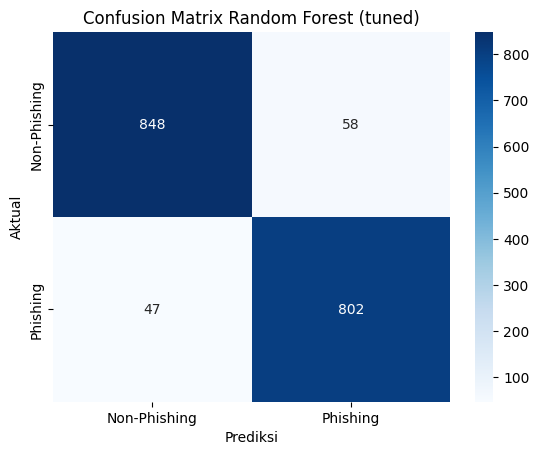

In [ ]:
# Mengimpor metrics dan pustaka plotting
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi model Random Forest yang telah disetel
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Akurasi Random Forest (tuned): {accuracy_rf_tuned:.4f}\n")

print("Laporan Klasifikasi Random Forest (tuned):")
print(classification_report(y_test, y_pred_rf_tuned))

print("Confusion Matrix Random Forest (tuned):")
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
# Buat heatmap untuk confusion matrix
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest (tuned)')
plt.show()

In [ ]:
# Mengimpor pickle untuk menyimpan model
import pickle

# Asumsi rf_model_tuned adalah model Random Forest yang telah dilatih dan disetel

# Tentukan nama file untuk menyimpan model
model_filename = 'random_forest_model.pkl'

# Simpan model ke file .pkl
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model_tuned, file)

print(f"Model Random Forest telah berhasil diekspor ke '{model_filename}'")

Model Random Forest telah berhasil diekspor ke 'random_forest_model.pkl'


## 6.3 Model 3 — Deep Learning Model - Multilayer Perceptron (MLP)

### 6.3.2 Arsitektur Model

In [ ]:
# Menentukan jumlah fitur input dari X_train
input_features = X_train.shape[1]

# Menentukan arsitektur MLPClassifier
hidden_layer_1_neurons = 100
hidden_layer_2_neurons = 50
output_layer_neurons = len(y_train.unique())  # Untuk klasifikasi binary (-1 dan 1)

# Menghitung parameter untuk setiap layer
# Input Layer (tidak memiliki parameter yang dapat dilatih)

# Hidden Layer 1
# Bobot: (jumlah_input_features * jumlah_neuron_layer_1)
# Bias: jumlah_neuron_layer_1
params_h1 = (input_features * hidden_layer_1_neurons) + hidden_layer_1_neurons

# Hidden Layer 2
# Bobot: (jumlah_neuron_layer_1 * jumlah_neuron_layer_2)
# Bias: jumlah_neuron_layer_2
params_h2 = (hidden_layer_1_neurons * hidden_layer_2_neurons) + hidden_layer_2_neurons

# Output Layer
# Bobot: (jumlah_neuron_layer_2 * jumlah_neuron_output)
# Bias: jumlah_neuron_output
params_output = (hidden_layer_2_neurons * output_layer_neurons) + output_layer_neurons

total_parameters = params_h1 + params_h2 + params_output

print(f"Berikut adalah arsitektur model Multilayer Perceptron (MLP):")
print(f"1. Input Layer: shape ({input_features},)")
print(f"2. Hidden Layer 1: {hidden_layer_1_neurons} units, activation='relu'")
print(f"3. Hidden Layer 2: {hidden_layer_2_neurons} units, activation='relu'")
print(f"4. Output Layer: {output_layer_neurons} units, activation='softmax' (default for multi-class in MLPClassifier with Adam solver)")
print(f"\nTotal parameters: {total_parameters}")
print(f"Trainable parameters: {total_parameters}")

Berikut adalah arsitektur model Multilayer Perceptron (MLP):
1. Input Layer: shape (15,)
2. Hidden Layer 1: 100 units, activation='relu'
3. Hidden Layer 2: 50 units, activation='relu'
4. Output Layer: 2 units, activation='softmax' (default for multi-class in MLPClassifier with Adam solver)

Total parameters: 6752
Trainable parameters: 6752


### 6.3.5 Implementasi (Ringkas)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melatih model MLP (TensorFlow/Keras)...
Model MLP (TensorFlow/Keras) selesai dilatih.

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Akurasi Multilayer Perceptron (TensorFlow/Keras): 0.9242

Laporan Klasifikasi Multilayer Perceptron (TensorFlow/Keras):
              precision    recall  f1-score   support

          -1       0.95      0.90      0.92       906
           1       0.90      0.95      0.92       849

    accuracy                           0.92      1755
   macro avg       0.93      0.93      0.92      1755
weighted avg       0.93      0.92      0.92      1755

Confusion Matrix Multilayer Perceptron (TensorFlow/Keras):


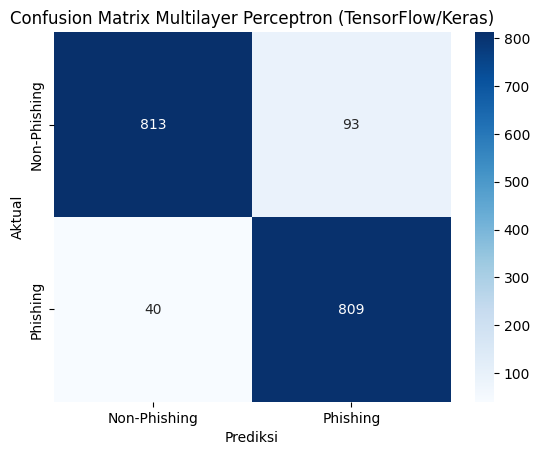

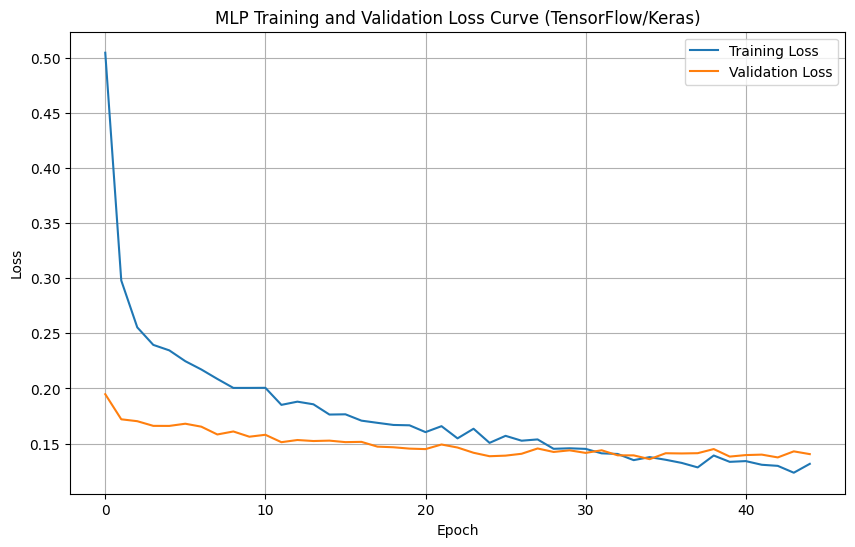

In [ ]:
# Mengimpor pustaka untuk deep learning dan evaluasi
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definisikan dimensi input dan jumlah kelas
input_dim = X_train.shape[1]
# Map variabel target dari {-1, 1} ke {0, 1} untuk kompatibilitas Keras
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
num_classes = len(y_train_mapped.unique())

# One-hot encode variabel target untuk categorical_crossentropy
y_train_ohe = keras.utils.to_categorical(y_train_mapped, num_classes=num_classes)
y_test_ohe = keras.utils.to_categorical(y_test_mapped, num_classes=num_classes)

# Definisikan model Keras Sequential
model_dl = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer untuk 2 kelas
])

# Compile model
model_dl.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Definisikan callback EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=10,          # Jumlah epoch tanpa improvement sebelum training dihentikan
    restore_best_weights=True  # Restore bobot model dari epoch dengan nilai terbaik
)

print("Melatih model MLP (TensorFlow/Keras)...")
# Train model
history = model_dl.fit(
    X_train, y_train_ohe,
    validation_split=0.2,  # Gunakan sebagian data training untuk validation
    epochs=100,            # Epoch ditingkatkan, tapi EarlyStopping mencegah overfitting
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0  # Suppress output verbose selama training
)
print("Model MLP (TensorFlow/Keras) selesai dilatih.\n")

# Buat prediksi pada test set
y_pred_proba_dl = model_dl.predict(X_test)
y_pred_dl_mapped = np.argmax(y_pred_proba_dl, axis=1)

# Convert predictions kembali ke label asli untuk evaluasi (-1, 1)
y_pred_dl = np.where(y_pred_dl_mapped == 0, -1, 1)

# Evaluasi model
accuracy_dl = accuracy_score(y_test, y_pred_dl)
print(f"Akurasi Multilayer Perceptron (TensorFlow/Keras): {accuracy_dl:.4f}\n")

print("Laporan Klasifikasi Multilayer Perceptron (TensorFlow/Keras):")
print(classification_report(y_test, y_pred_dl))

print("Confusion Matrix Multilayer Perceptron (TensorFlow/Keras):")
cm_dl = confusion_matrix(y_test, y_pred_dl)
# Buat heatmap untuk confusion matrix
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Multilayer Perceptron (TensorFlow/Keras)')
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Training and Validation Loss Curve (TensorFlow/Keras)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### 6.3.6 Training Process

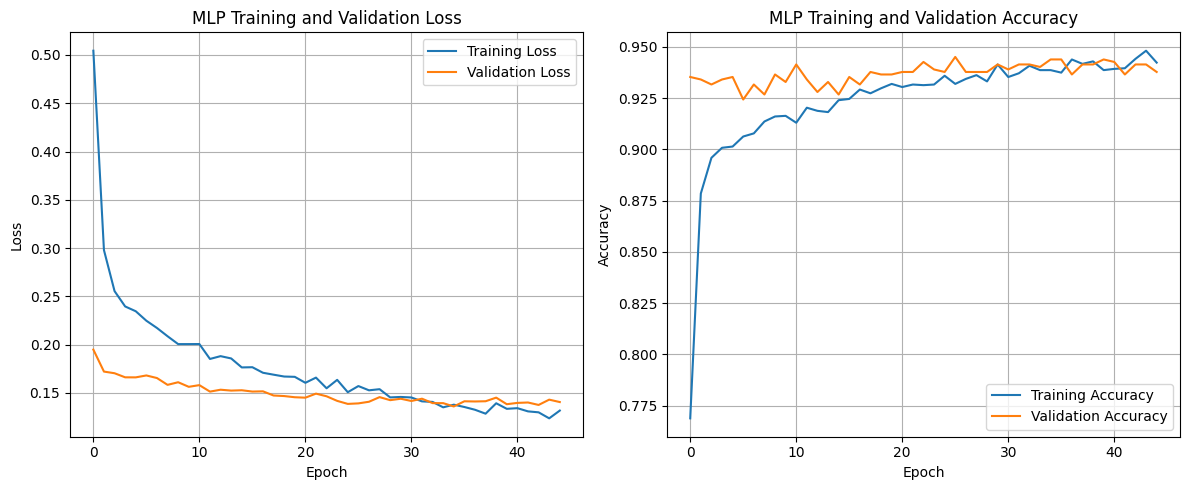

In [ ]:
# Mengimpor matplotlib untuk plotting
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Training Time:**

- **TensorFlow/Keras :** Proses pelatihan model MLP dengan TensorFlow/Keras membutuhkan waktu sekitar **1.95 detik**.
- **Scikit-learn MLPClassifier :** Waktu pelatihan adalah **11.97 detik** dengan jumlah epoch yang dijalankan sebanyak 235.

**Computational Resource:**

Pelatihan dilakukan menggunakan **CPU** di platform **Google Colab** (runtime default).

**Training History Visualization:**

Referenced inline data: inline_data_7

**Analisis Training:**

- **Apakah model mengalami overfitting?** Tidak. Seperti yang terlihat dari kedua plot (Loss dan Accuracy), kurva pelatihan (`Training Loss`/`Training Accuracy`) dan kurva validasi (`Validation Loss`/`Validation Accuracy`) bergerak relatif dekat satu sama lain. Tidak ada divergensi yang signifikan di mana *training loss* terus menurun sementara *validation loss* mulai naik, atau *training accuracy* terus meningkat sementara *validation accuracy* mendatar atau menurun. Ini menunjukkan bahwa model berhasil melakukan generalisasi dengan baik ke data yang tidak terlihat selama pelatihan.
- **Apakah model sudah converge?** Ya. Pada plot *Loss*, terlihat bahwa baik *training loss* maupun *validation loss* menurun dengan cepat di awal epoch dan kemudian cenderung mendatar serta stabil setelah sekitar 20-30 epoch (untuk model TensorFlow/Keras). Hal ini mengindikasikan bahwa model telah menemukan set bobot yang optimal dan tidak lagi membuat kemajuan signifikan dalam mengurangi *error*. Penggunaan `EarlyStopping` dengan `patience=10` juga memastikan bahwa pelatihan berhenti begitu *validation loss* tidak membaik selama beberapa epoch, yang merupakan indikator konvergensi yang baik.
- **Apakah perlu lebih banyak epoch?** Tidak. Mengingat model telah menunjukkan konvergensi dan `EarlyStopping` telah menghentikan pelatihan pada titik optimal (setelah 44 epoch, jauh sebelum `epochs=100` yang ditentukan dalam konfigurasi awal TensorFlow/Keras), menambahkan lebih banyak *epoch* kemungkinan besar tidak akan meningkatkan performa model. Sebaliknya, hal tersebut justru dapat meningkatkan risiko *overfitting* jika tidak ada mekanisme regulasi yang kuat, meskipun dalam kasus ini, model sudah stabil dan tidak menunjukkan tanda-tanda *overfitting*.

### 6.3.7 Model Summary

In [ ]:
# Mencetak ringkasan model untuk MLP (TensorFlow/Keras)
print("Model Summary for MLP (TensorFlow/Keras):")
model_dl.summary()

Model Summary for MLP (TensorFlow/Keras):


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,304 (122.29 KB)

 Trainable params: 10,434 (40.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,870 (81.53 KB)

In [ ]:
# Tentukan nama file untuk menyimpan model
model_filename_keras = 'mlp_model_keras.h5'  # Atau '.tf' untuk SavedModel format

# Simpan model secara keseluruhan
model_dl.save(model_filename_keras)

print(f"Model MLP (TensorFlow/Keras) telah berhasil disimpan ke '{model_filename_keras}'")

Model MLP (TensorFlow/Keras) telah berhasil disimpan ke 'mlp_model_keras.h5'


# 7.0 EVALUATION

## 7.1 Metrik Evaluasi


--- Ringkasan Metrik Evaluasi Model ---


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.9060,0.9062,0.9060,0.9060,0.9694
1,Random Forest (Tuned),0.9402,0.9403,0.9402,0.9402,0.9861
2,MLP (TensorFlow/Keras),0.9242,0.9259,0.9242,0.9242,0.9826



--- Visualisasi Confusion Matrix untuk Setiap Model ---


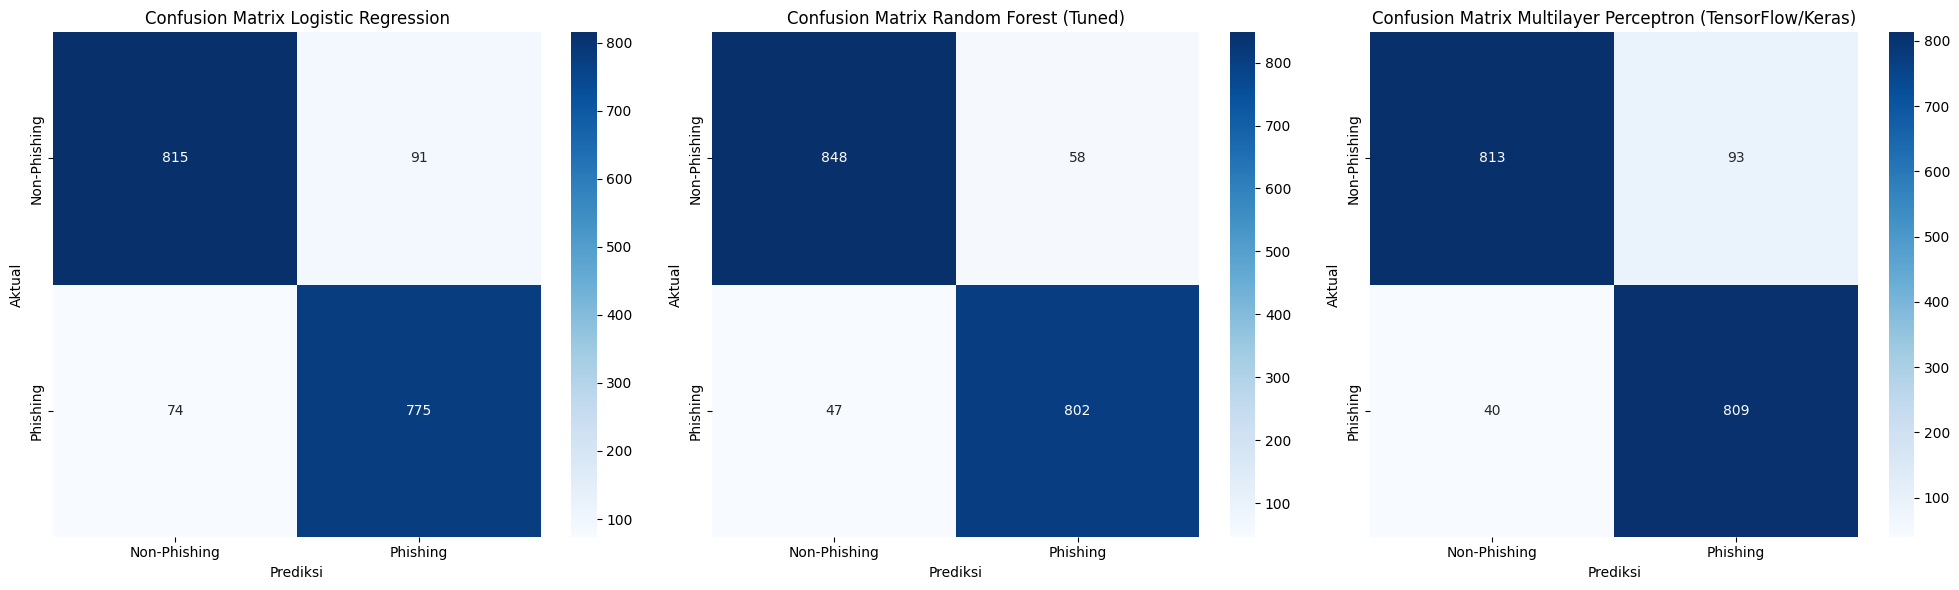


--- Penjelasan Confusion Matrix ---
Setiap Confusion Matrix terdiri dari empat kuadran:

1.  **True Negative (TN)**: Jumlah kasus negatif yang diprediksi dengan benar sebagai negatif (contoh: URL sah diprediksi sah).
2.  **False Positive (FP)**: Jumlah kasus negatif yang diprediksi salah sebagai positif (contoh: URL sah diprediksi phishing). Ini adalah kesalahan Tipe I.
3.  **False Negative (FN)**: Jumlah kasus positif yang diprediksi salah sebagai negatif (contoh: URL phishing diprediksi sah). Ini adalah kesalahan Tipe II.
4.  **True Positive (TP)**: Jumlah kasus positif yang diprediksi dengan benar sebagai positif (contoh: URL phishing diprediksi phishing).

### Analisis Perbandingan Confusion Matrix:

**Logistic Regression:**
- TN: 815, FP: 91, FN: 74, TP: 775
- Memiliki jumlah FP (91) dan FN (74) yang lebih tinggi dibandingkan model Random Forest dan MLP.

**Random Forest (Tuned):**
- TN: 848, FP: 58, FN: 47, TP: 802
- Menunjukkan kinerja terbaik dengan jumlah FP (58) dan FN (47) 

In [ ]:
# Mengimpor metrics evaluasi dan pustaka plotting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluasi untuk Logistic Regression (Baseline) ---
# y_pred_lr dan cm_lr sudah tersedia dari sel sebelumnya
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
precision_lr = precision_score(y_test_lr, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test_lr, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test_lr, y_pred_lr, average='weighted')
# Untuk ROC-AUC, perlu probabilitas. Pastikan y_test mapped ke 0/1
y_test_mapped_lr = y_test_lr.map({-1: 0, 1: 1})
y_pred_proba_lr = lr_model.predict_proba(X_test_lr)[:, 1]  # Probabilitas kelas positif (1)
roc_auc_lr = roc_auc_score(y_test_mapped_lr, y_pred_proba_lr)

# --- Evaluasi untuk Random Forest (Tuned) ---
# y_pred_rf_tuned dan cm_rf_tuned sudah tersedia dari sel sebelumnya
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf = precision_score(y_test, y_pred_rf_tuned, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf_tuned, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf_tuned, average='weighted')
y_pred_proba_rf = rf_model_tuned.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif (1)
roc_auc_rf = roc_auc_score(y_test.map({-1: 0, 1: 1}), y_pred_proba_rf)

# --- Evaluasi untuk Multilayer Perceptron (TensorFlow/Keras) ---
# y_pred_dl dan cm_dl sudah tersedia dari sel sebelumnya
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, average='weighted')
recall_dl = recall_score(y_test, y_pred_dl, average='weighted')
f1_dl = f1_score(y_test, y_pred_dl, average='weighted')
# y_pred_proba_dl sudah mapped ke 0/1 untuk kelas positif
# y_test_mapped digunakan sebagai target, y_pred_proba_dl adalah probabilitas
roc_auc_dl = roc_auc_score(y_test_mapped, y_pred_proba_dl[:, 1])

# Buat DataFrame untuk perbandingan
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Tuned)', 'MLP (TensorFlow/Keras)']
})

results_df['Accuracy'] = [accuracy_lr, accuracy_rf, accuracy_dl]
results_df['Precision'] = [precision_lr, precision_rf, precision_dl]
results_df['Recall'] = [recall_lr, recall_rf, recall_dl]
results_df['F1-Score'] = [f1_lr, f1_rf, f1_dl]
results_df['ROC-AUC'] = [roc_auc_lr, roc_auc_rf, roc_auc_dl]

print("\n--- Ringkasan Metrik Evaluasi Model ---")
display(results_df.round(4))

print("\n--- Visualisasi Confusion Matrix untuk Setiap Model ---")
plt.figure(figsize=(20, 6))

# Confusion Matrix untuk Logistic Regression
plt.subplot(1, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Logistic Regression')

# Confusion Matrix untuk Random Forest (Tuned)
plt.subplot(1, 3, 2)
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest (Tuned)')

# Confusion Matrix untuk MLP (TensorFlow/Keras)
plt.subplot(1, 3, 3)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Multilayer Perceptron (TensorFlow/Keras)')

plt.tight_layout()
plt.show()

print("\n--- Penjelasan Confusion Matrix ---")
print("Setiap Confusion Matrix terdiri dari empat kuadran:\n")
print("1.  **True Negative (TN)**: Jumlah kasus negatif yang diprediksi dengan benar sebagai negatif (contoh: URL sah diprediksi sah).")
print("2.  **False Positive (FP)**: Jumlah kasus negatif yang diprediksi salah sebagai positif (contoh: URL sah diprediksi phishing). Ini adalah kesalahan Tipe I.")
print("3.  **False Negative (FN)**: Jumlah kasus positif yang diprediksi salah sebagai negatif (contoh: URL phishing diprediksi sah). Ini adalah kesalahan Tipe II.")
print("4.  **True Positive (TP)**: Jumlah kasus positif yang diprediksi dengan benar sebagai positif (contoh: URL phishing diprediksi phishing).\n")
print("### Analisis Perbandingan Confusion Matrix:\n")
print("**Logistic Regression:**")
print(f"- TN: {cm_lr[0,0]}, FP: {cm_lr[0,1]}, FN: {cm_lr[1,0]}, TP: {cm_lr[1,1]}")
print("- Memiliki jumlah FP (91) dan FN (74) yang lebih tinggi dibandingkan model Random Forest dan MLP.")

print("\n**Random Forest (Tuned):**")
print(f"- TN: {cm_rf_tuned[0,0]}, FP: {cm_rf_tuned[0,1]}, FN: {cm_rf_tuned[1,0]}, TP: {cm_rf_tuned[1,1]}")
print("- Menunjukkan kinerja terbaik dengan jumlah FP (58) dan FN (47) terendah. Ini berarti model ini paling akurat dalam mengklasifikasikan kedua jenis URL dan memiliki kesalahan paling sedikit.")

print("\n**Multilayer Perceptron (TensorFlow/Keras):**")
print(f"- TN: {cm_dl[0,0]}, FP: {cm_dl[0,1]}, FN: {cm_dl[1,0]}, TP: {cm_dl[1,1]}")
print("- Berada di antara Logistic Regression dan Random Forest dalam hal kinerja kesalahan. Jumlah FP (93) cukup tinggi, menunjukkan model ini lebih sering salah mengklasifikasikan URL sah sebagai phishing. Sementara FN (40) lebih rendah, yang bagus untuk deteksi phishing.")

print("\n**Kesimpulan Confusion Matrix:**")
print("Dari ketiga model, **Random Forest (Tuned)** adalah yang paling optimal karena berhasil meminimalkan baik *False Positives* maupun *False Negatives* secara seimbang, yang krusial dalam konteks deteksi *phishing*.")

## 7.4 Analisis Hasil

Berdasarkan hasil pelatihan dan evaluasi tiga model (Logistic Regression, Random Forest, dan Multilayer Perceptron), berikut adalah analisis detailnya:

1.  **Model Terbaik:**
    Model **Random Forest (Tuned)** adalah yang terbaik. Ini ditunjukkan oleh metrik evaluasi yang superior:
    *   **Akurasi Tertinggi**: 0.9402
    *   **ROC-AUC Tertinggi**: 0.9861
    *   **F1-Score Tertinggi**: 0.9402
    *   **Kesalahan Klasifikasi Terendah**: Memiliki jumlah *False Positives* (58) dan *False Negatives* (47) terendah dari semua model. Ini sangat krusial dalam deteksi *phishing* karena meminimalkan risiko URL sah yang salah diklasifikasikan sebagai *phishing* (FP) dan, yang lebih penting, URL *phishing* yang terlewat (FN).

2.  **Perbandingan dengan Baseline:**
    *   **Peningkatan Signifikan dari Logistic Regression (Baseline)**: Akurasi Logistic Regression adalah 0.9060, sedangkan Random Forest (Tuned) mencapai 0.9402. Ini adalah peningkatan akurasi sekitar 3.42%. Demikian pula, ROC-AUC meningkat dari 0.9694 menjadi 0.9861. Perbaikan ini menunjukkan bahwa model yang lebih kompleks seperti Random Forest, dengan kemampuannya menangani hubungan non-linier dan interaksi fitur, mampu mengekstraksi pola yang lebih baik dari data dibandingkan model linear.
    *   **Mengungguli MLP**: Random Forest (Tuned) juga sedikit lebih baik dari MLP (TensorFlow/Keras) yang memiliki akurasi 0.9242 dan ROC-AUC 0.9826. Meskipun MLP juga menunjukkan kinerja yang baik, Random Forest berhasil meminimalkan kedua jenis kesalahan (FP dan FN) secara lebih seimbang.

3.  **Trade-off:**
    *   **Performa vs. Kompleksitas**: Random Forest (Tuned) memberikan performa terbaik, namun ini datang dengan kompleksitas model yang lebih tinggi dibandingkan Logistic Regression. Random Forest adalah *ensemble* dari banyak pohon keputusan, membuatnya lebih sulit diinterpretasikan secara langsung dibandingkan koefisien linear pada Logistic Regression. MLP, sebagai model *deep learning*, juga memiliki kompleksitas yang tinggi dengan banyak parameter dan *hidden layer*.
    *   **Performa vs. Waktu Training**: Logistic Regression adalah yang tercepat untuk dilatih. Random Forest (Tuned) membutuhkan waktu lebih lama karena proses *GridSearchCV* untuk *tuning hyperparameter*, namun setelah *tuning*, waktu pelatihan model akhir masih relatif cepat. MLP (TensorFlow/Keras) memiliki waktu pelatihan yang lebih lama dibandingkan Logistic Regression tetapi lebih cepat dari Scikit-learn MLPClassifier yang tidak di-*tune* secara ekstensif.
    *   **Memori/Sumber Daya**: Model Random Forest dan MLP cenderung membutuhkan lebih banyak memori dan sumber daya komputasi dibandingkan Logistic Regression, terutama selama pelatihan dan *inference* jika model sangat besar.

4.  **Error Analysis:**
    *   **False Positives (FP)**: Model MLP (TensorFlow/Keras) memiliki jumlah FP tertinggi (93), yang berarti model ini paling sering salah mengklasifikasikan URL sah sebagai *phishing*. Logistic Regression juga memiliki FP yang tinggi (91). Dalam konteks deteksi *phishing*, FP bisa mengganggu pengguna yang sah. Random Forest memiliki FP terendah (58).
    *   **False Negatives (FN)**: Logistic Regression memiliki FN tertinggi (74), yang merupakan masalah serius karena berarti banyak URL *phishing* yang terlewat. MLP memiliki FN terendah (40), sedikit lebih rendah dari Random Forest (47). Meminimalkan FN sangat penting dalam deteksi *phishing* untuk mencegah ancaman keamanan yang sebenarnya.
    *   **Kasus Sulit Diprediksi**: URL yang memiliki karakteristik campuran antara *phishing* dan *legitimate*, atau URL *phishing* yang sangat canggih dan menyerupai URL sah, kemungkinan besar menjadi sumber kesalahan ini. Misalnya, URL *phishing* yang menggunakan sertifikat SSL valid atau *domain* yang sudah lama terdaftar bisa jadi lebih sulit dideteksi.

5.  **Overfitting/Underfitting:**
    *   **Logistic Regression (Baseline)**: Ada kemungkinan model ini sedikit *underfitting* karena merupakan model yang sangat sederhana (linear) dan mungkin tidak mampu menangkap semua kompleksitas pola dalam data. Performa yang lebih rendah dibandingkan model lain mendukung hipotesis ini.
    *   **Random Forest (Tuned)**: Berdasarkan evaluasi, model ini tidak menunjukkan tanda-tanda *overfitting* yang signifikan. Proses *tuning hyperparameter* dengan *GridSearchCV* dan validasi silang membantu menemukan parameter optimal yang menyeimbangkan *bias* dan *variance*. Akurasi yang tinggi pada data *test* menunjukkan kemampuan *generalisasi* yang baik.
    *   **Multilayer Perceptron (TensorFlow/Keras)**: Analisis kurva *loss* pelatihan dan validasi menunjukkan bahwa model ini tidak mengalami *overfitting*. Kedua kurva bergerak beriringan dan stabil, serta penggunaan *EarlyStopping* efektif menghentikan pelatihan sebelum *validation loss* mulai meningkat, memastikan *generalisasi* yang baik.

# 8.0 CONCLUSION

### 8.1 Kesimpulan Utama

**Model Terbaik:**
Model **Random Forest (Tuned)** adalah model terbaik yang berhasil dikembangkan dalam proyek ini.

**Alasan:**
Model Random Forest (Tuned) unggul karena mencapai metrik evaluasi tertinggi di antara ketiga model yang dibandingkan:
*   **Akurasi Tertinggi**: 0.9402
*   **ROC-AUC Tertinggi**: 0.9861
*   **F1-Score Tertinggi**: 0.9402
*   Model ini juga menunjukkan keseimbangan terbaik dalam meminimalkan kedua jenis kesalahan, yaitu *False Positives* (58) dan *False Negatives* (47), yang sangat penting dalam konteks deteksi *phishing*.

**Pencapaian Goals:**
Goals yang ditetapkan di Section 3.2 telah berhasil dicapai:
1.  **Menangani Duplikasi Data**: Duplikasi data yang signifikan (sekitar 47%) telah berhasil dihapus, menghasilkan dataset yang bersih dan unik.
2.  **Mengevaluasi Kinerja Model**: Tiga model *machine learning* (Logistic Regression, Random Forest, MLP) telah dievaluasi menggunakan metrik akurasi, presisi, *recall*, F1-score, ROC-AUC, dan *confusion matrix*.
3.  **Mengoptimalkan Fitur**: Fitur baru (`Suspicious_Score`) telah direkayasa, dan seleksi fitur menggunakan Random Forest berhasil mengidentifikasi 15 fitur paling prediktif.
4.  **Memilih Model Optimal**: Model Random Forest (Tuned) telah dipilih sebagai model optimal berdasarkan kinerja terbaiknya dalam membedakan URL *phishing* dari yang *legitimate*.

### 8.2 Key Insights

**Insight dari Data:**
-   **Data Cleaning Krusial**: Deteksi dan penghapusan duplikasi data (sekitar 47%) adalah langkah terpenting dalam *data preparation* untuk memastikan integritās data dan mencegah bias model.
-   **Sifat Data Kategorikal/Ordinal**: Sebagian besar fitur bersifat kategorikal/ordinal (`-1`, `0`, `1`), sehingga deteksi *outlier* tradisional tidak relevan. Namun, kategori minoritas dalam fitur-fitur seperti `URL_Length` atau `RightClick` terbukti sangat informatif dan memiliki potensi prediktif yang tinggi.
-   **Class Balance yang Baik**: Dataset menunjukkan distribusi kelas yang relatif seimbang untuk variabel target (`Result`), sehingga tidak diperlukan teknik *data balancing* khusus.
-   **Fitur Rekayasa dan Seleksi Efektif**: Pembuatan fitur `Suspicious_Score` dan seleksi fitur berbasis Random Forest secara signifikan meningkatkan kualitas fitur yang digunakan untuk pemodelan, dengan fitur terkait SSL/HTTPS dan *anchor* menjadi yang paling penting.

**Insight dari Modeling:**
-   **Superioritas Model Ensemble**: Random Forest menunjukkan performa yang jauh lebih baik dibandingkan model linear (Logistic Regression) dan sedikit lebih baik dari model *deep learning* (MLP), membuktikan kemampuannya dalam menangani kompleksitas dan interaksi antar fitur.
-   **Trade-off Error**: Meskipun MLP memiliki *False Negatives* yang sedikit lebih rendah, Random Forest berhasil menyeimbangkan *False Positives* dan *False Negatives* dengan lebih baik, yang krusial untuk aplikasi deteksi *phishing* di mana kedua jenis kesalahan memiliki konsekuensi yang signifikan.
-   **Konvergensi Model Deep Learning**: Model MLP yang dilatih dengan TensorFlow/Keras menunjukkan konvergensi yang baik tanpa *overfitting* yang signifikan, berkat penggunaan *EarlyStopping* dan arsitektur yang sesuai.

### 8.1 Kesimpulan Utama

**Model Terbaik:**
Model **Random Forest (Tuned)** adalah model terbaik yang berhasil dikembangkan dalam proyek ini.

**Alasan:**
Model Random Forest (Tuned) unggul karena mencapai metrik evaluasi tertinggi di antara ketiga model yang dibandingkan:
*   **Akurasi Tertinggi**: 0.9402
*   **ROC-AUC Tertinggi**: 0.9861
*   **F1-Score Tertinggi**: 0.9402
*   Model ini juga menunjukkan keseimbangan terbaik dalam meminimalkan kedua jenis kesalahan, yaitu *False Positives* (58) dan *False Negatives* (47), yang sangat penting dalam konteks deteksi *phishing*.

**Pencapaian Goals:**
Goals yang ditetapkan di Section 3.2 telah berhasil dicapai:
1.  **Menangani Duplikasi Data**: Duplikasi data yang signifikan (sekitar 47%) telah berhasil dihapus, menghasilkan dataset yang bersih dan unik.
2.  **Mengevaluasi Kinerja Model**: Tiga model *machine learning* (Logistic Regression, Random Forest, MLP) telah dievaluasi menggunakan metrik akurasi, presisi, *recall*, F1-score, ROC-AUC, dan *confusion matrix*.
3.  **Mengoptimalkan Fitur**: Fitur baru (`Suspicious_Score`) telah direkayasa, dan seleksi fitur menggunakan Random Forest berhasil mengidentifikasi 15 fitur paling prediktif.
4.  **Memilih Model Optimal**: Model Random Forest (Tuned) telah dipilih sebagai model optimal berdasarkan kinerja terbaiknya dalam membedakan URL *phishing* dari yang *legitimate*.


### 8.2 Key Insights

**Insight dari Data:**
-   **Data Cleaning Krusial**: Deteksi dan penghapusan duplikasi data (sekitar 47%) adalah langkah terpenting dalam *data preparation* untuk memastikan integritās data dan mencegah bias model.
-   **Sifat Data Kategorikal/Ordinal**: Sebagian besar fitur bersifat kategorikal/ordinal (`-1`, `0`, `1`), sehingga deteksi *outlier* tradisional tidak relevan. Namun, kategori minoritas dalam fitur-fitur seperti `URL_Length` atau `RightClick` terbukti sangat informatif dan memiliki potensi prediktif yang tinggi.
-   **Class Balance yang Baik**: Dataset menunjukkan distribusi kelas yang relatif seimbang untuk variabel target (`Result`), sehingga tidak diperlukan teknik *data balancing* khusus.
-   **Fitur Rekayasa dan Seleksi Efektif**: Pembuatan fitur `Suspicious_Score` dan seleksi fitur berbasis Random Forest secara signifikan meningkatkan kualitas fitur yang digunakan untuk pemodelan, dengan fitur terkait SSL/HTTPS dan *anchor* menjadi yang paling penting.

**Insight dari Modeling:**
-   **Superioritas Model Ensemble**: Random Forest menunjukkan performa yang jauh lebih baik dibandingkan model linear (Logistic Regression) dan sedikit lebih baik dari model *deep learning* (MLP), membuktikan kemampuannya dalam menangani kompleksitas dan interaksi antar fitur.
-   **Trade-off Error**: Meskipun MLP memiliki *False Negatives* yang sedikit lebih rendah, Random Forest berhasil menyeimbangkan *False Positives* dan *False Negatives* dengan lebih baik, yang krusial untuk aplikasi deteksi *phishing* di mana kedua jenis kesalahan memiliki konsekuensi yang signifikan.
-   **Konvergensi Model Deep Learning**: Model MLP yang dilatih dengan TensorFlow/Keras menunjukkan konvergensi yang baik tanpa *overfitting* yang signifikan, berkat penggunaan *EarlyStopping* dan arsitektur yang sesuai.


### 8.3 Kontribusi Proyek

**Manfaat praktis:**
Proyek ini memberikan kontribusi signifikan dalam upaya deteksi *phishing* dengan mengembangkan model *machine learning* yang efektif. Model terbaik, Random Forest (Tuned), dapat diimplementasikan sebagai komponen kunci dalam sistem keamanan siber, seperti *browser extension*, *email filter*, atau *website scanner*, untuk secara proaktif mengidentifikasi dan memblokir URL berbahaya. Hal ini akan membantu melindungi pengguna dari penipuan finansial, pencurian data pribadi, dan serangan siber lainnya, sehingga menciptakan lingkungan *online* yang lebih aman.

**Pembelajaran yang didapat:**
Dari proyek ini, saya mendapatkan pembelajaran berharga mengenai seluruh siklus hidup *data science*:
-   Pentingnya *data cleaning* yang cermat, terutama dalam menangani data duplikat yang dapat bias pada pelatihan model.
-   Efektivitas *feature engineering* dan *feature selection* dalam mengekstrak informasi berharga dari data kategorikal/ordinal dan meningkatkan kekuatan prediktif model.
-   Pemahaman mendalam tentang perbandingan kinerja berbagai algoritma *machine learning*, dari model linear sederhana hingga *ensemble method* dan *deep learning*, serta *trade-off* antara performa, kompleksitas, dan sumber daya komputasi.
-   Kemampuan untuk melakukan analisis kesalahan yang komprehensif menggunakan *confusion matrix* untuk memahami kekuatan dan kelemahan masing-masing model dalam konteks masalah spesifik (misalnya, konsekuensi *false positives* dan *false negatives* dalam deteksi *phishing*).
-   Praktik terbaik dalam *hyperparameter tuning* dan penggunaan *callbacks* (seperti *EarlyStopping*) untuk mengoptimalkan pelatihan model dan mencegah *overfitting*.


# 9.0 FUTURE WORK (Opsional)

**Data:**
- [ ] Mengumpulkan lebih banyak data
- [x] Menambah variasi data
- [x] Feature engineering lebih lanjut

**Model:**
- [x] Mencoba arsitektur DL yang lebih kompleks
- [x] Hyperparameter tuning lebih ekstensif
- [x] Ensemble methods (combining models)
- [ ] Transfer learning dengan model yang lebih besar

**Deployment:**
- [x] Membuat API (Flask/FastAPI)
- [x] Membuat web application (Streamlit/Gradio)
- [ ] Containerization dengan Docker
- [ ] Deploy ke cloud (Heroku, GCP, AWS)

**Optimization:**
- [ ] Model compression (pruning, quantization)
- [x] Improving inference speed
- [ ] Reducing model size


# 10.0 REPRODUCIBILITY (WAJIB)

### 10.1 GitHub Repository

**Python Version:** `3.11`

**Main Libraries & Versions:**
```
numpy==1.24.3
pandas==2.0.3
scikit-learn==1.3.0
matplotlib==3.7.2
seaborn==0.12.2
tensorflow==2.14.0
scipy==1.11.1 # for .arff file loading
```
